# Compare Data and Simulated spectra
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS
- creation date   : June 20th 2017
- re-written after new simulation SimulateSpectrum : 18th October 2017


In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
print theNotebook

AnaCompareDataSimSpec


In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

AnaCompareDataSimSpec
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/CTIOAnaJun2017/ana_05jun17/HD205905


In [6]:
%config InlineBackend.rc = {}
matplotlib.rc_file("../../templates/matplotlibrc")

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [7]:
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'figure.figsize' : (10, 5)})

In [8]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Initialisation

## Input

In [9]:
inputdir="./simandcalibspec"
MIN_IMGNUMBER=46
MAX_IMGNUMBER=126
date="20170605"
object_name='HD205905'
tag = "calibandSimSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output Fits file

In [10]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

In [11]:
outputdir="./spectrum_compdatasim"

In [12]:
ensure_dir(outputdir)

# Open Input Files

In [13]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [14]:
sorted_numbers

array([ 46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126])

In [15]:
sorted_files

array(['./simandcalibspec/calibandSimSpectra_20170605_046.fits',
       './simandcalibspec/calibandSimSpectra_20170605_047.fits',
       './simandcalibspec/calibandSimSpectra_20170605_048.fits',
       './simandcalibspec/calibandSimSpectra_20170605_049.fits',
       './simandcalibspec/calibandSimSpectra_20170605_050.fits',
       './simandcalibspec/calibandSimSpectra_20170605_051.fits',
       './simandcalibspec/calibandSimSpectra_20170605_052.fits',
       './simandcalibspec/calibandSimSpectra_20170605_053.fits',
       './simandcalibspec/calibandSimSpectra_20170605_054.fits',
       './simandcalibspec/calibandSimSpectra_20170605_055.fits',
       './simandcalibspec/calibandSimSpectra_20170605_056.fits',
       './simandcalibspec/calibandSimSpectra_20170605_057.fits',
       './simandcalibspec/calibandSimSpectra_20170605_058.fits',
       './simandcalibspec/calibandSimSpectra_20170605_059.fits',
       './simandcalibspec/calibandSimSpectra_20170605_060.fits',
       './simandcalibspec

In [16]:

all_headers, \
all_dates, \
all_objects, \
all_airmass, \
all_titles, \
all_exposures, \
all_ut, all_ra,all_dec,all_epoch,all_zenith,all_ha,all_st,all_alt,all_focus,\
all_temp, all_press,all_hum,all_windsp,\
all_seeing,all_seeingam,\
all_filt,all_filt1,all_filt2,\
all_leftspectra_data, \
all_rightspectra_data, \
all_leftspectra_data_stat_err ,\
all_rightspectra_data_stat_err ,\
all_leftspectra_wl,\
all_rightspectra_wl, \
all_totleftspectra_data, \
all_totrightspectra_data, \
all_sim_spectra_wl, \
all_sim_spectra_data=BuildCalibandSimSpecFull(sorted_files,sorted_numbers)

## Clean Spectra

- storage add trailing empty bins ..

In [17]:
all_sim_spectra_wl_cut,all_sim_spectra_data_cut=RemoveBadWavelengths(all_sim_spectra_wl,all_sim_spectra_data)

In [18]:
all_leftspectra_wl_cut,all_leftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data)
all_rightspectra_wl_cut,all_rightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data)

all_leftspectra_wl_cut,all_totleftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_totleftspectra_data)
all_rightspectra_wl_cut,all_totrightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_totrightspectra_data)

all_leftspectra_wl_cut,all_leftspectra_data_stat_err_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data_stat_err)
all_rightspectra_wl_cut,all_rightspectra_data_stat_err_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data_stat_err)

In [19]:
all_sim_spectra_wl,all_sim_spectra_data=all_sim_spectra_wl_cut,all_sim_spectra_data_cut

In [20]:
all_rightspectra_wl,all_rightspectra_data=all_rightspectra_wl_cut,all_rightspectra_data_cut

In [21]:
all_totleftspectra_data=all_totleftspectra_data_cut
all_totrightspectra_data=all_totrightspectra_data_cut
all_rightspectra_data_stat_err=all_rightspectra_data_stat_err_cut
all_leftspectra_data_stat_err=all_leftspectra_data_stat_err_cut

## Check

In [22]:
NDATA=len(all_headers)

for idx in range(NDATA):
    print idx,all_headers[idx]["FILTERS"]

0 dia Thor300
1 dia HoloPhP
2 dia HoloPhAg
3 dia HoloAmAg
4 dia Thor300
5 dia HoloPhP
6 dia HoloPhAg
7 dia HoloAmAg
8 dia Thor300
9 dia HoloPhP
10 dia HoloPhAg
11 dia HoloAmAg
12 dia Thor300
13 dia HoloPhP
14 dia HoloPhAg
15 dia HoloAmAg
16 dia Thor300
17 dia HoloPhP
18 dia HoloPhAg
19 dia HoloAmAg
20 dia Thor300
21 dia HoloPhP
22 dia HoloPhAg
23 dia HoloAmAg
24 dia Thor300
25 dia HoloPhP
26 dia HoloPhAg
27 dia HoloAmAg
28 dia Thor300
29 dia HoloPhP
30 dia HoloPhAg
31 dia HoloAmAg
32 dia Thor300
33 dia HoloPhP
34 dia HoloPhAg
35 dia HoloAmAg
36 dia Thor300
37 dia HoloPhP
38 dia HoloPhAg
39 dia HoloAmAg
40 dia Thor300
41 dia HoloPhP
42 dia HoloPhAg
43 dia HoloAmAg
44 dia Thor300
45 dia HoloPhP
46 dia HoloPhAg
47 dia HoloAmAg
48 dia Thor300
49 dia HoloPhP
50 dia HoloPhAg
51 dia HoloAmAg
52 dia Thor300
53 dia HoloPhAg
54 dia HoloAmAg
55 dia Thor300
56 dia HoloPhP
57 dia HoloPhAg
58 dia HoloAmAg
59 dia Thor300
60 dia HoloPhP
61 dia HoloPhAg
62 dia HoloAmAg
63 dia Thor300
64 dia HoloPhP
65 

# Analysis

## Dispersers

In [23]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [24]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  []
dia Thor300  	 : filt1_idx ::  [ 0  4  8 12 16 20 24 28 32 36 40 44 48 52 55 59 63 67 71 75 79]
dia HoloPhP  	 : filt2_idx ::  [ 1  5  9 13 17 21 25 29 33 37 41 45 49 56 60 64 68 72 76]
dia HoloPhAg  	 : filt3_idx ::  [ 2  6 10 14 18 22 26 30 34 38 42 46 50 53 57 61 65 69 73 77]
dia HoloAmAg  	 : filt4_idx ::  [ 3  7 11 15 19 23 27 31 35 39 43 47 51 54 58 62 66 70 74 78]
dia Ron200  	 : filt5_idx ::  []
Unknown  	 : filt6_idx ::  []


In [25]:
Thor300_index=np.array(filt1_idx)
Ron400_index=np.array(filt0_idx)
HoloPhP_index=np.array(filt2_idx)
HoloPhAg_index=np.array(filt3_idx)
HoloAmAg_index=np.array(filt4_idx)
Ron200_index=np.array(filt5_idx)

## Airmass

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


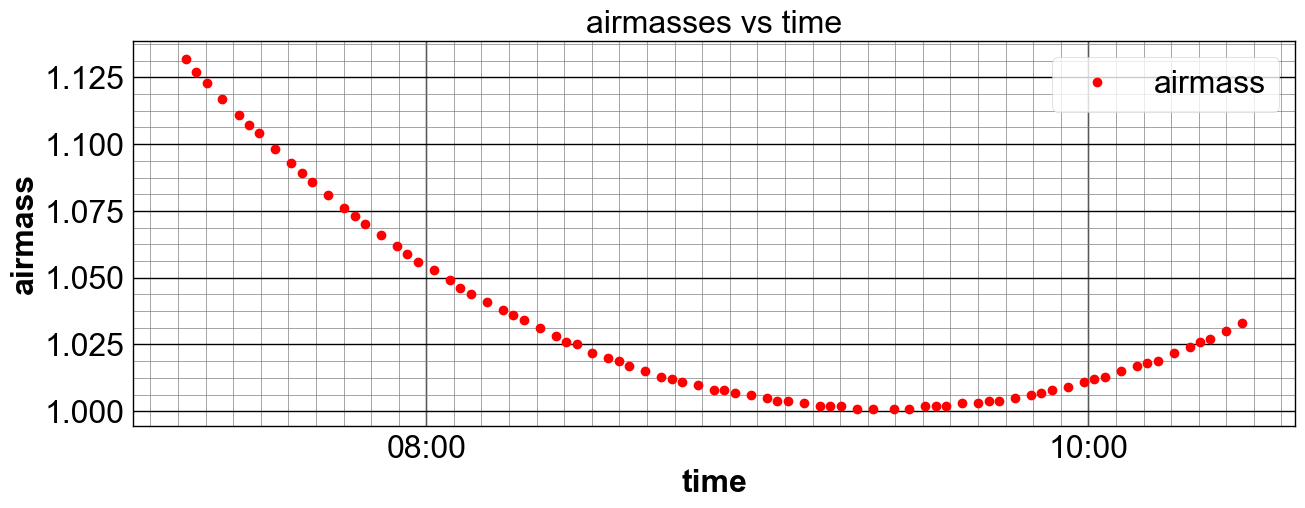

In [26]:
PlotDataVsDateTime(all_dates,all_airmass,"airmasses vs time","time","airmass",dir_top_images,'airmass_vs_time.pdf')

## Show Spectra
==========================

In [27]:
NDATA=len(all_rightspectra_data)

### Work only on right spectra

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


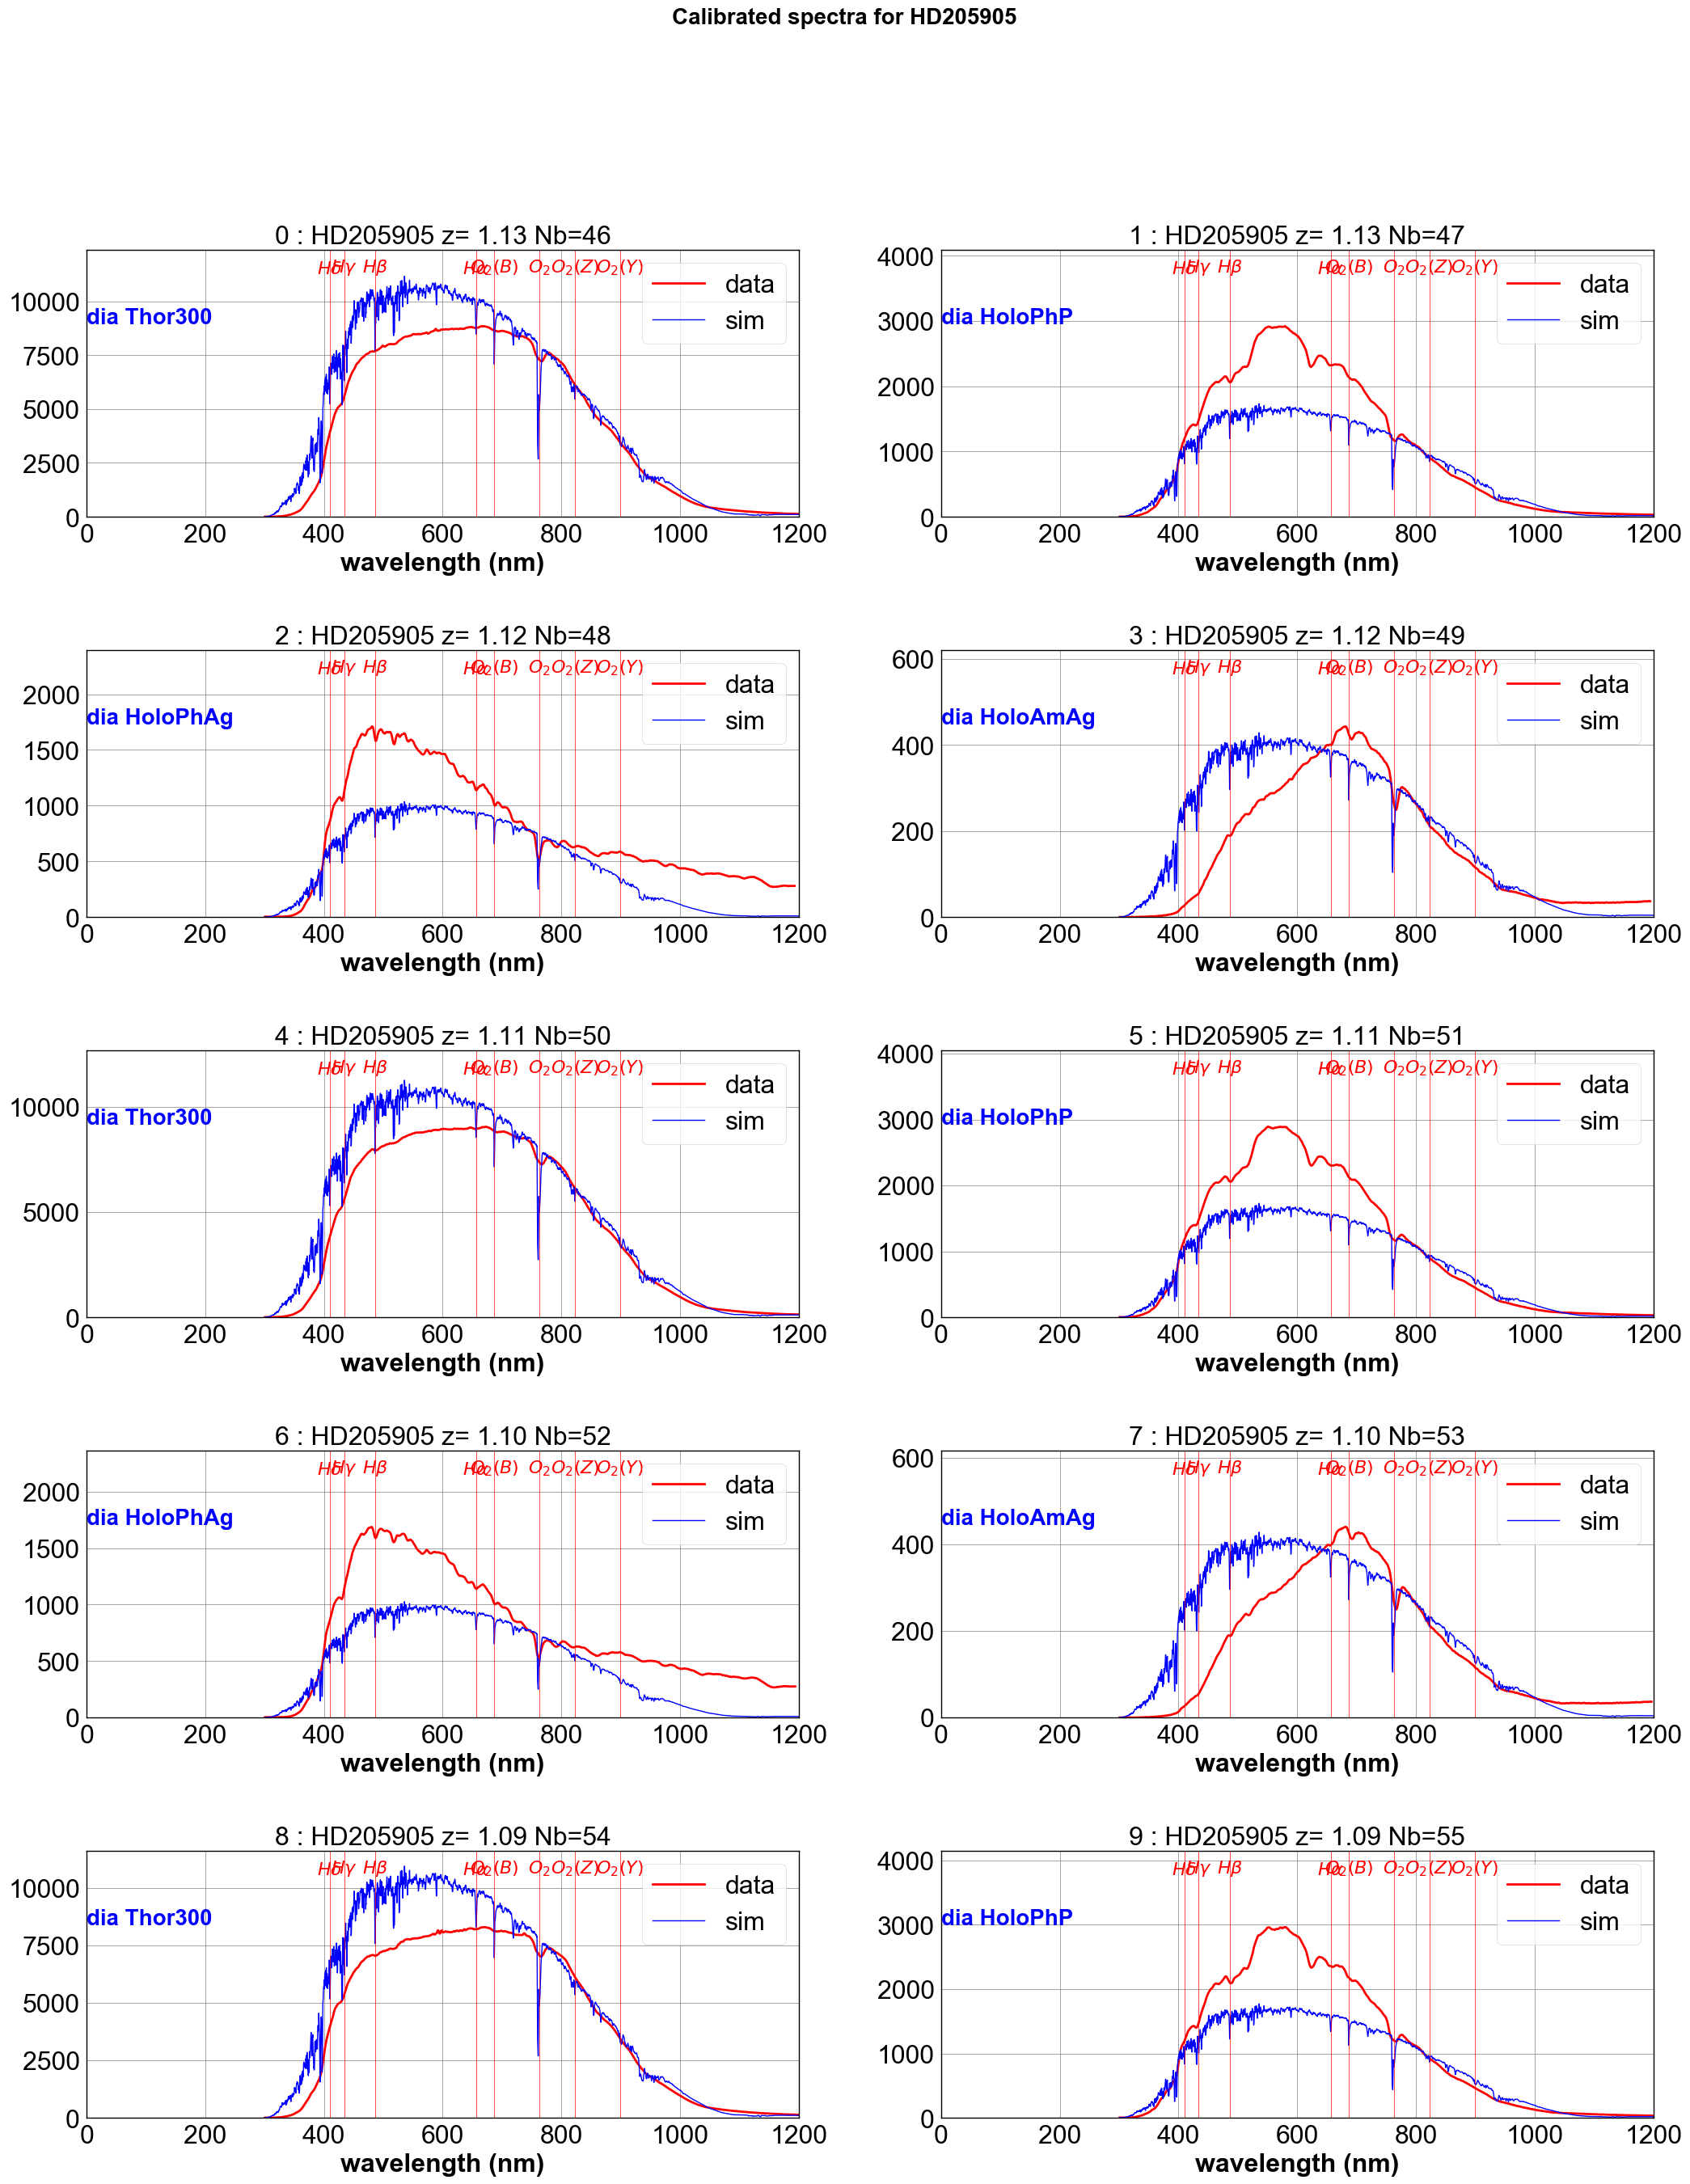

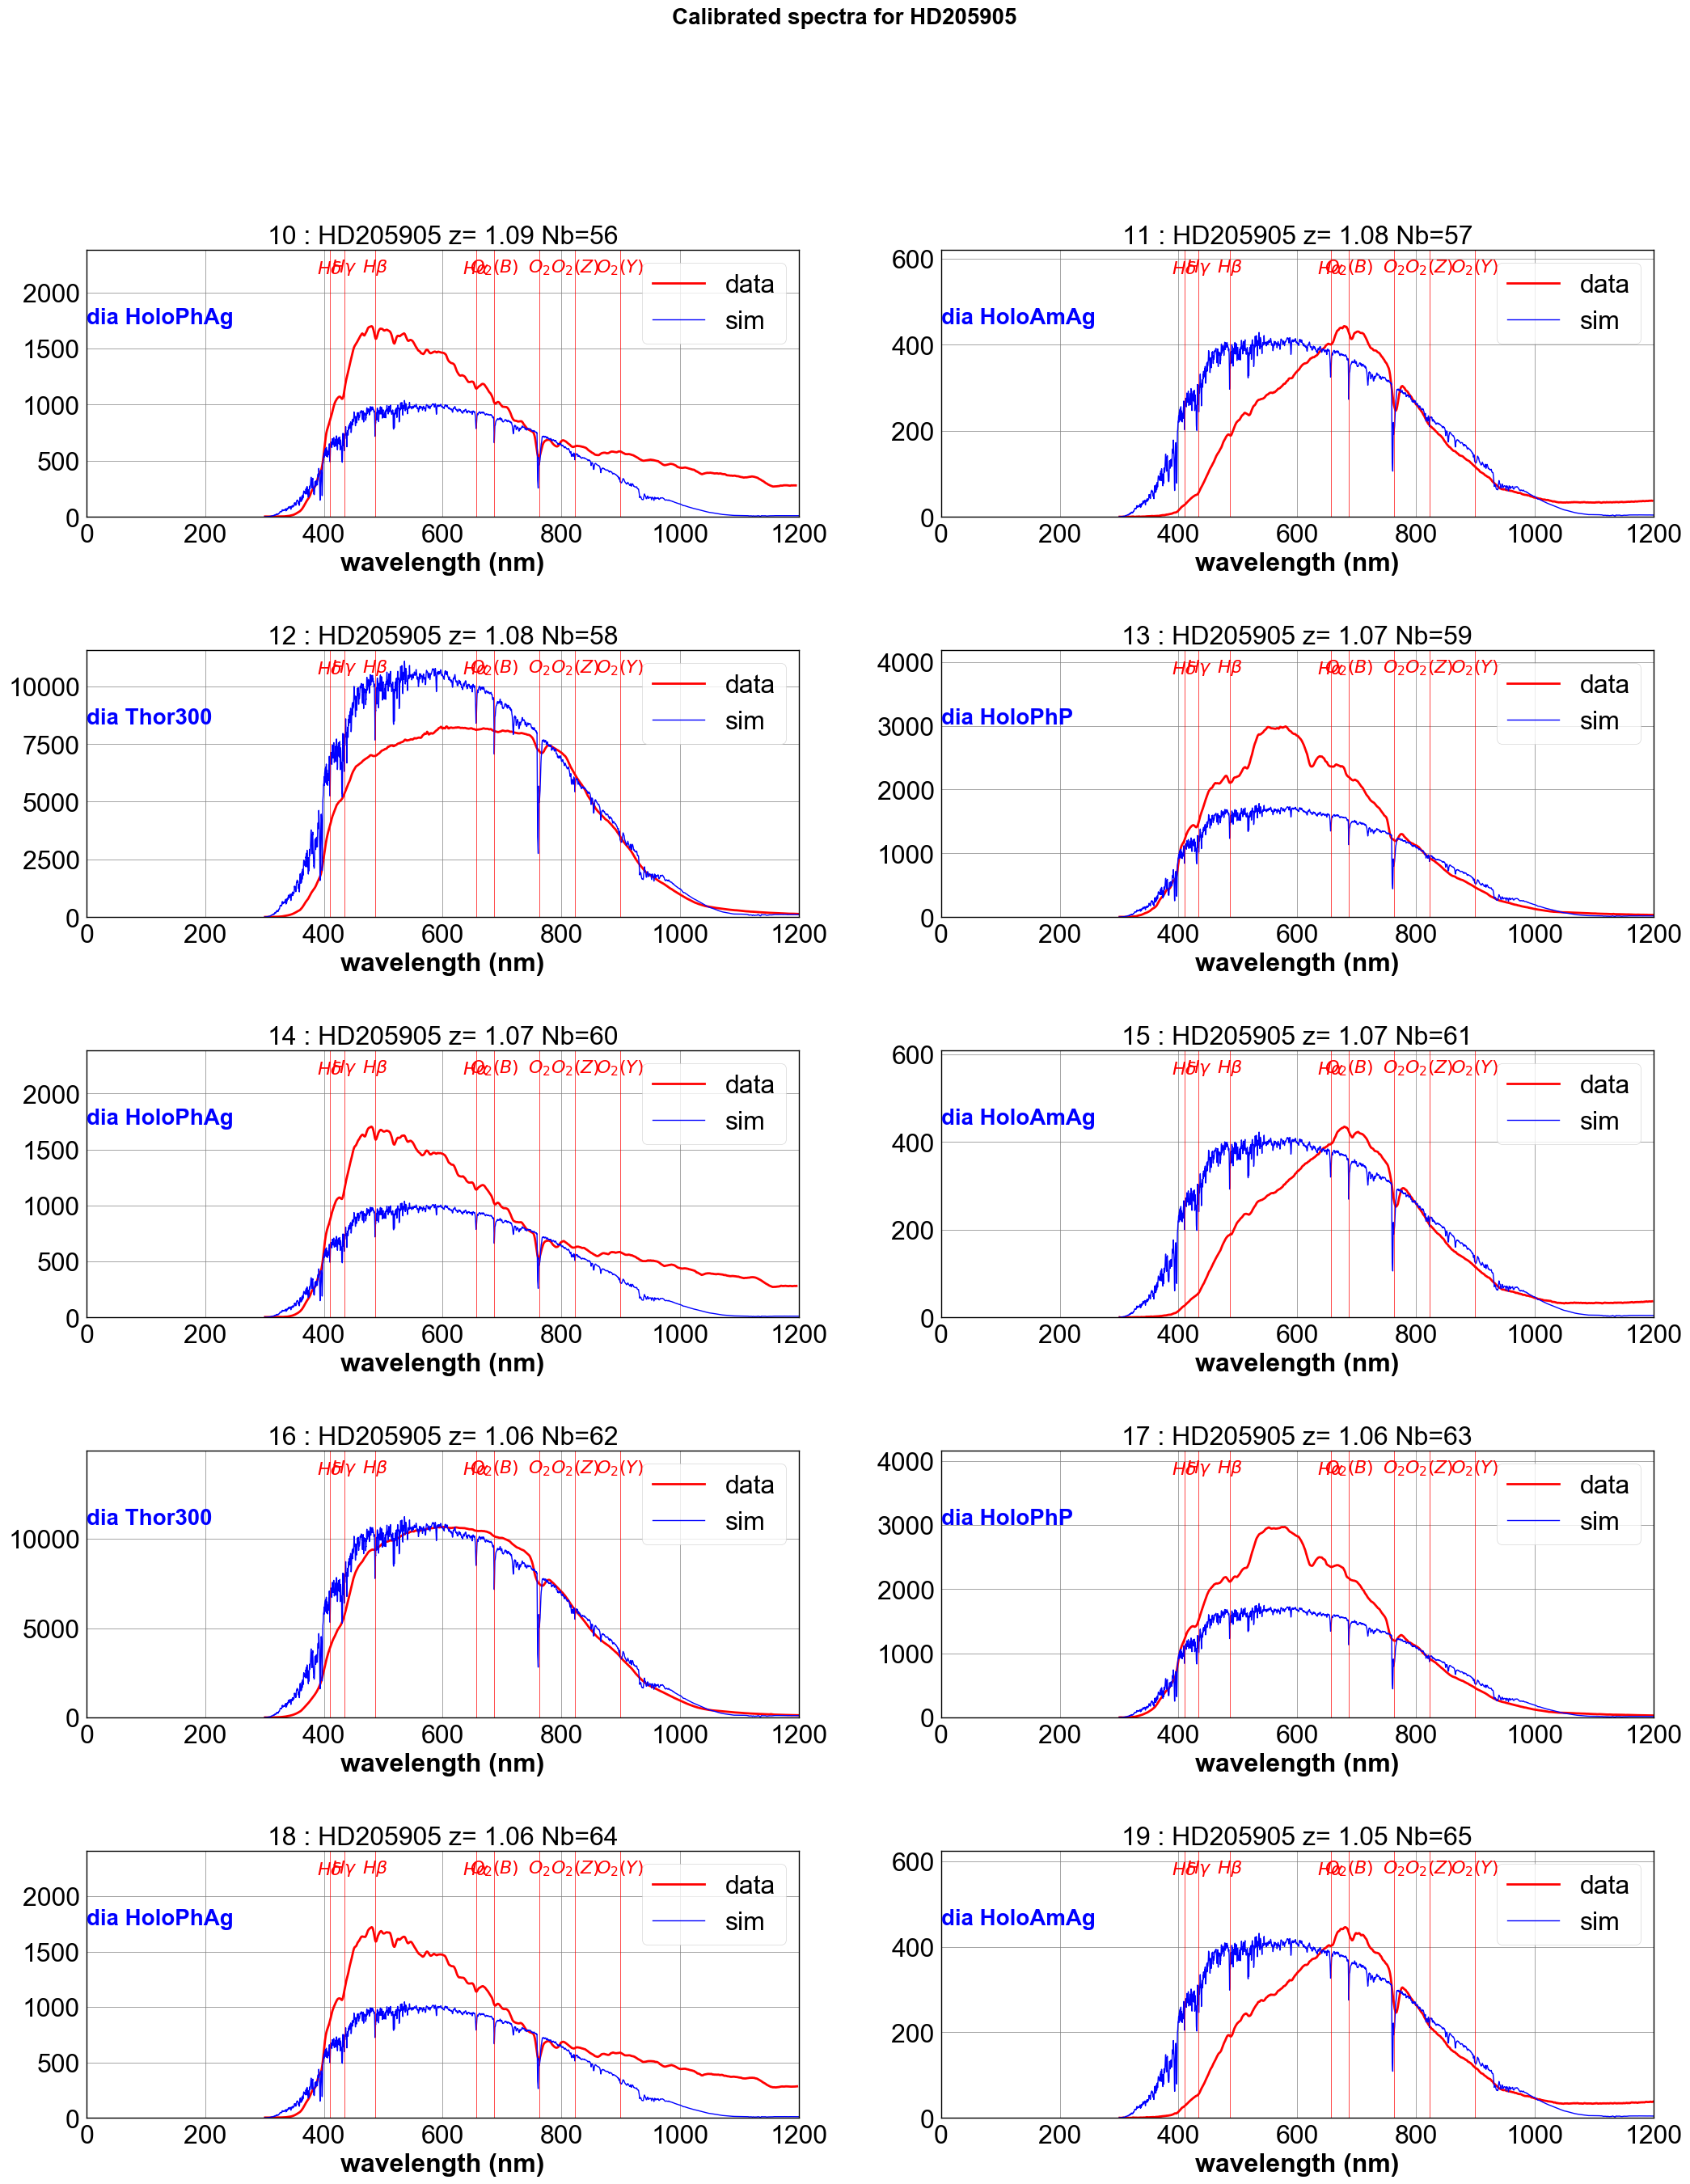

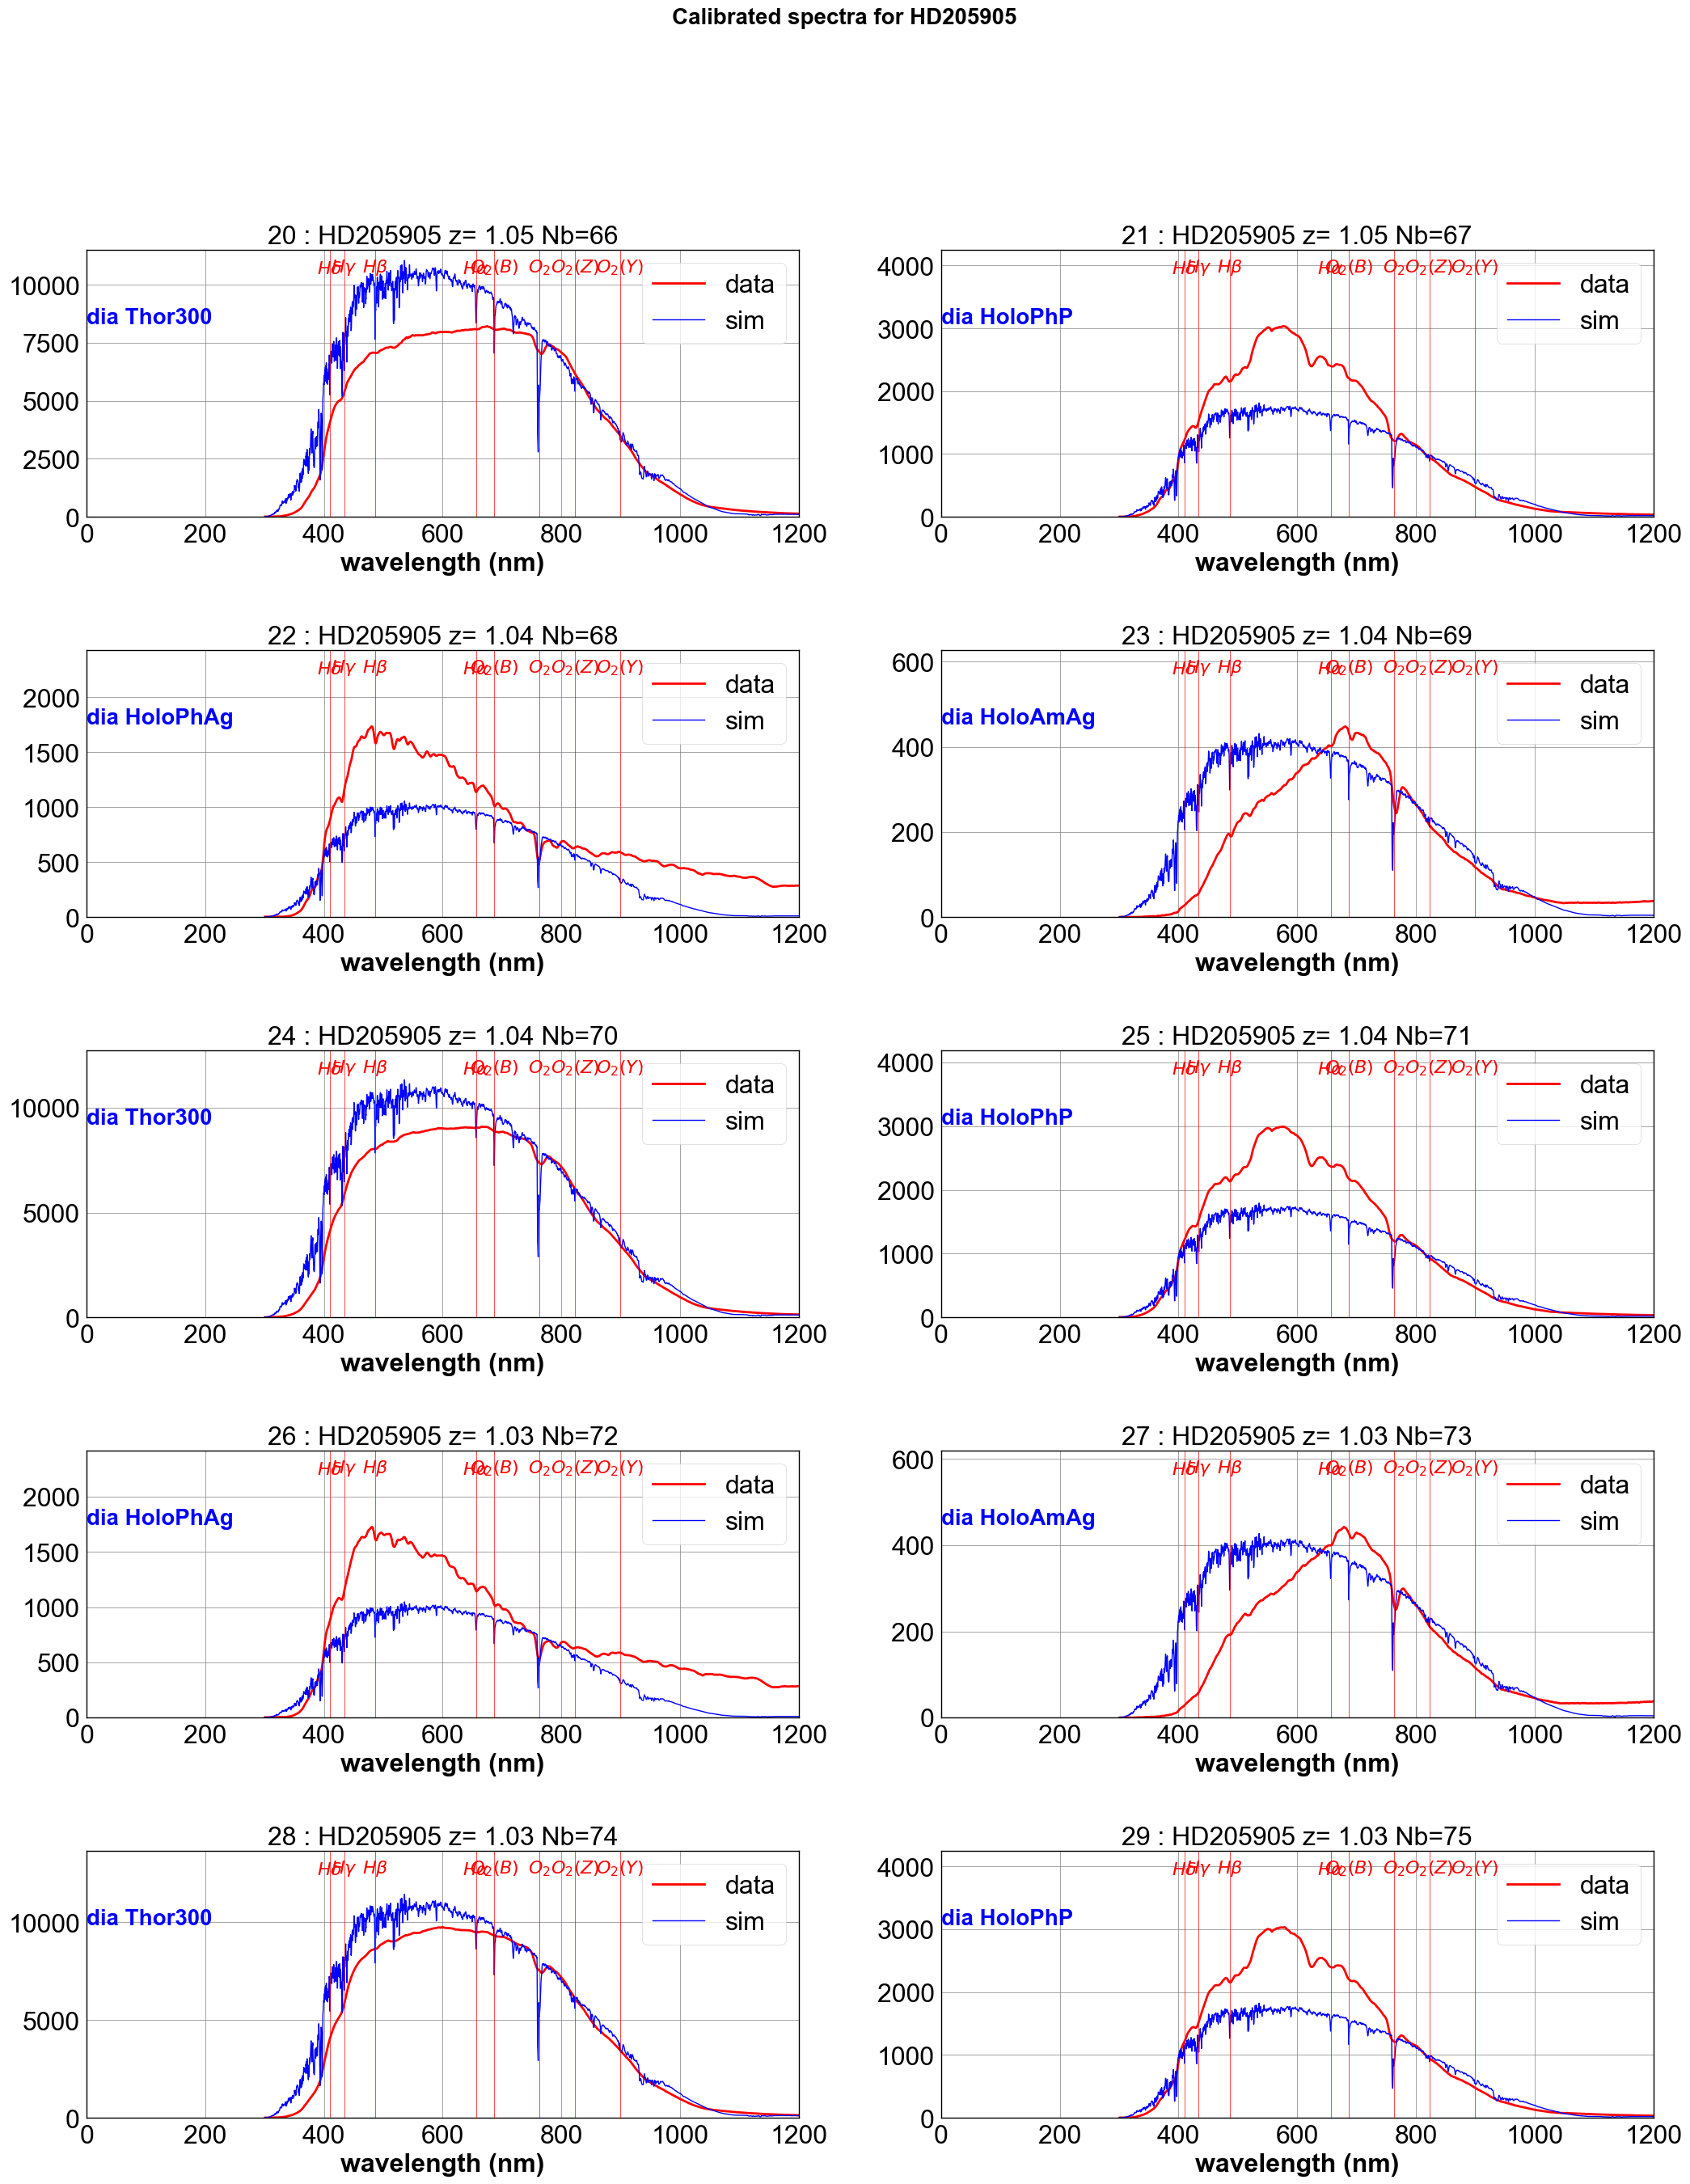

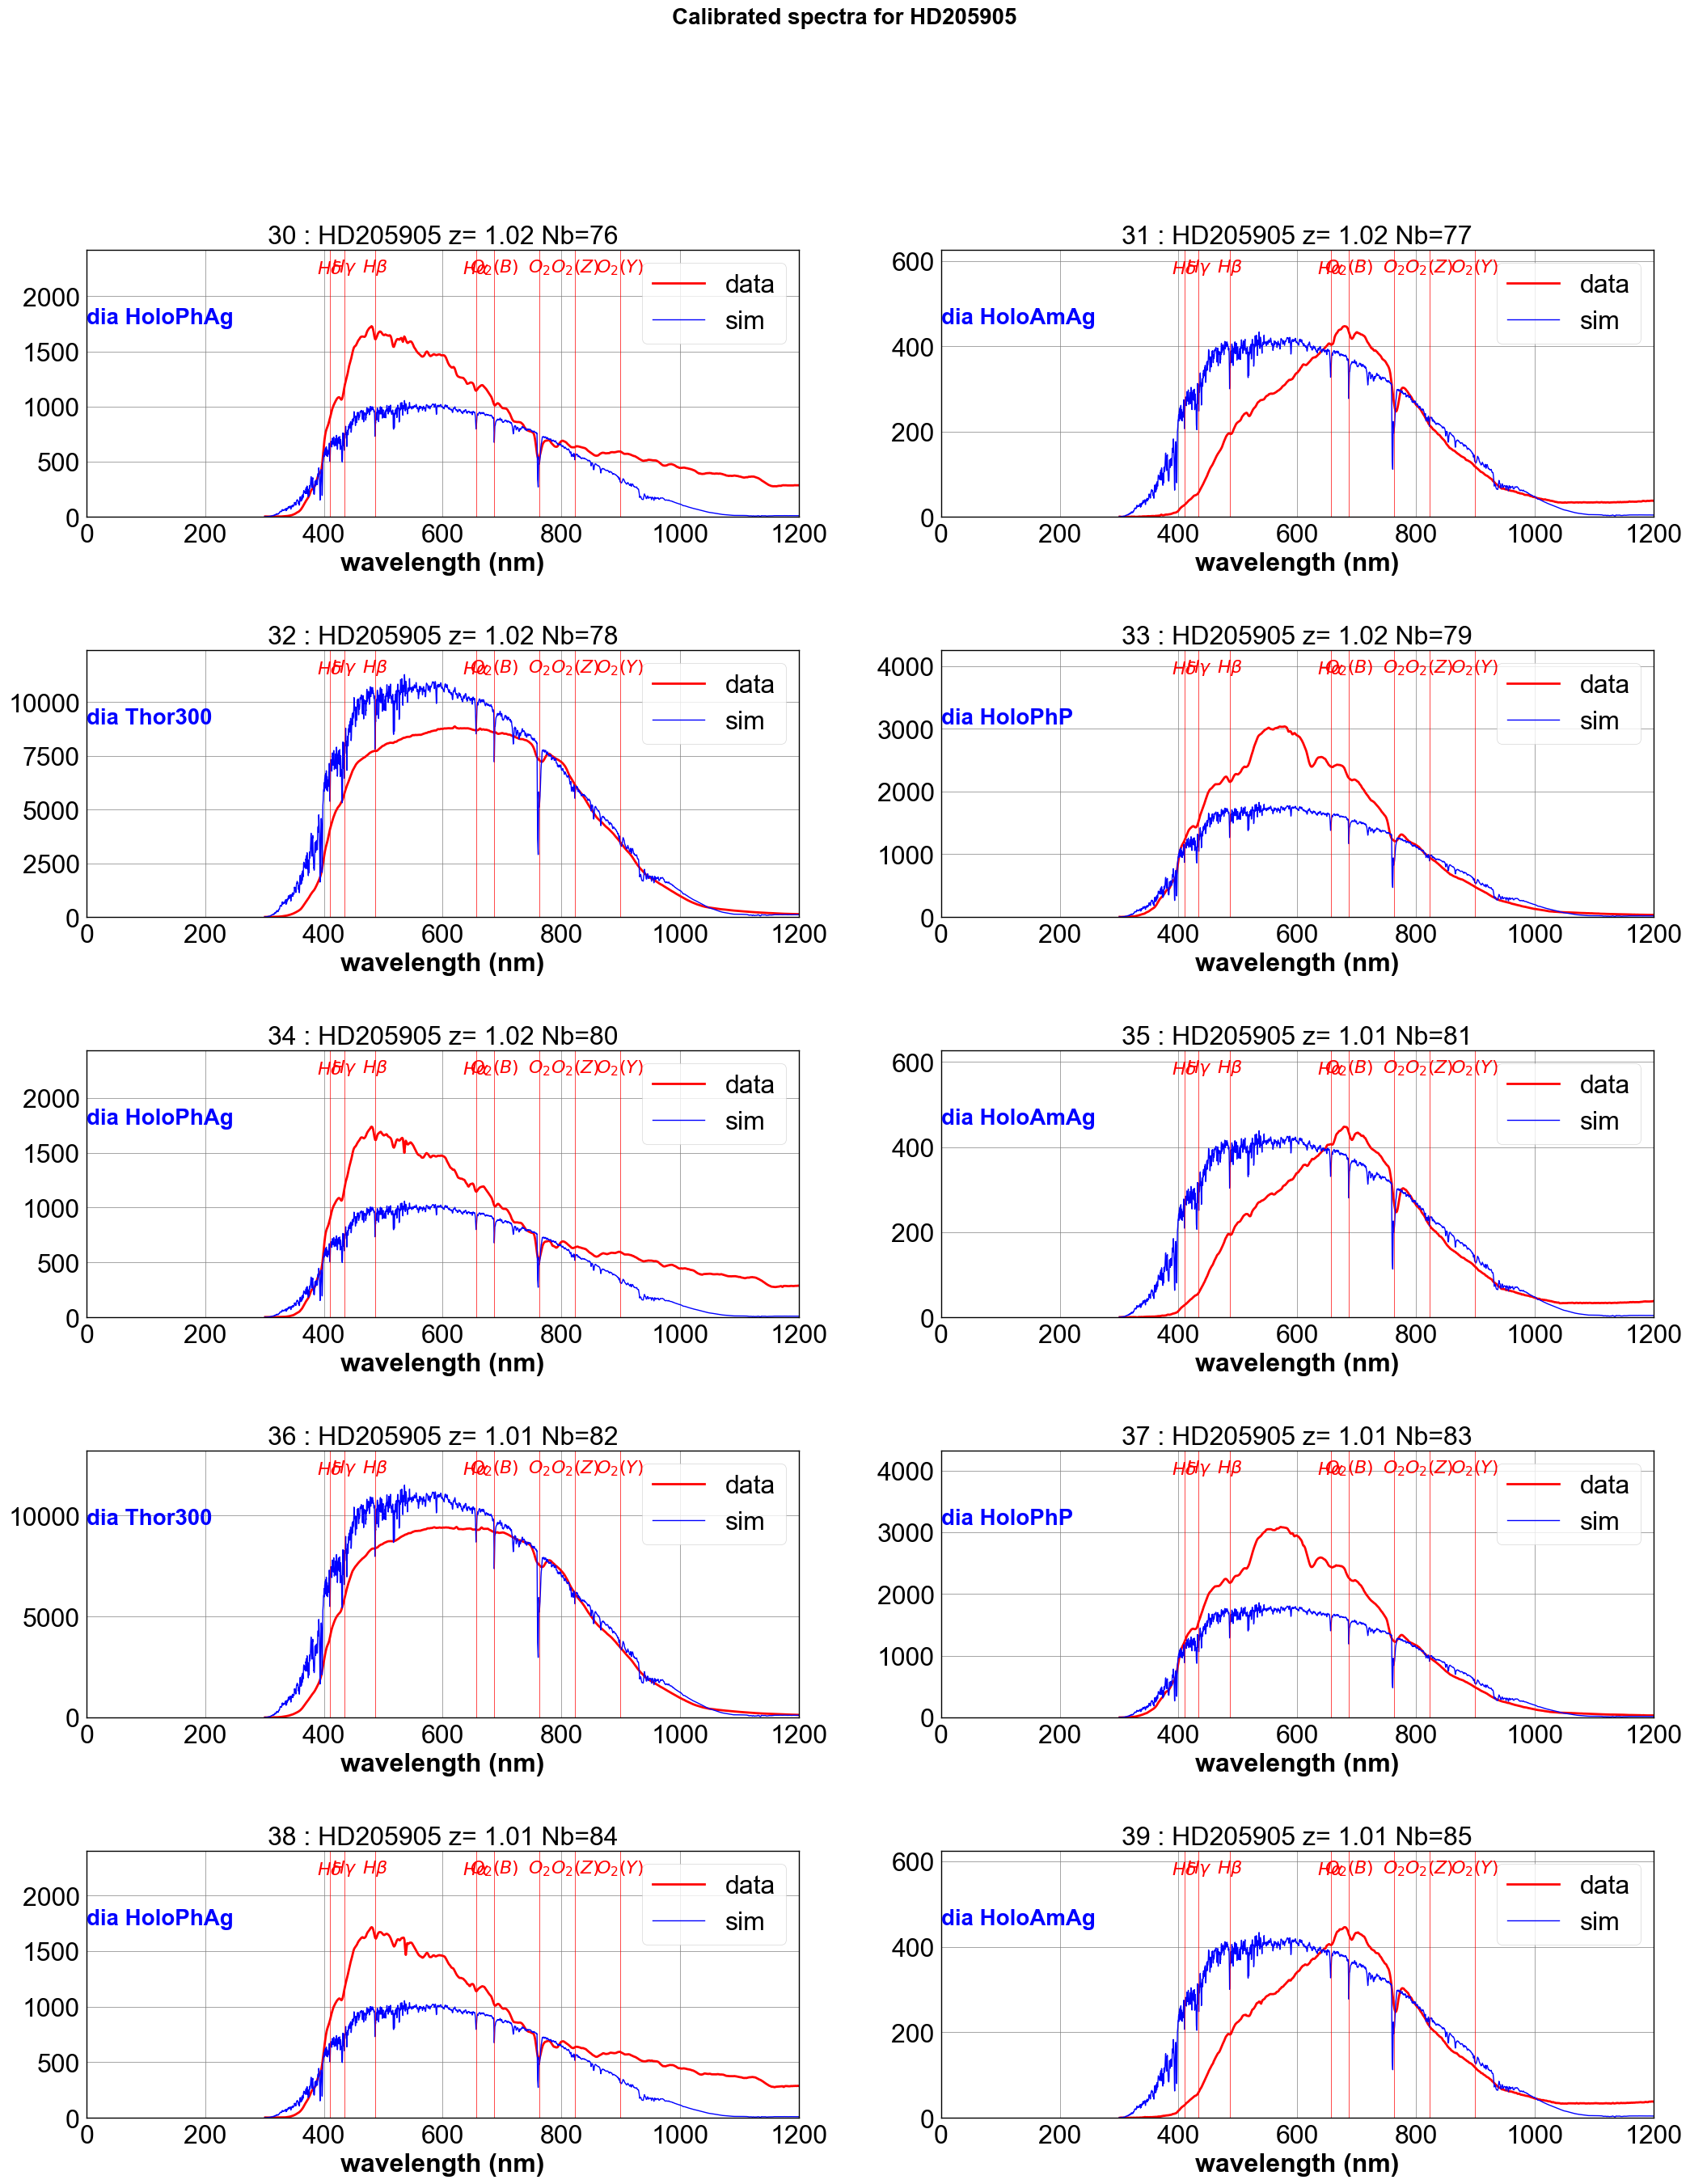

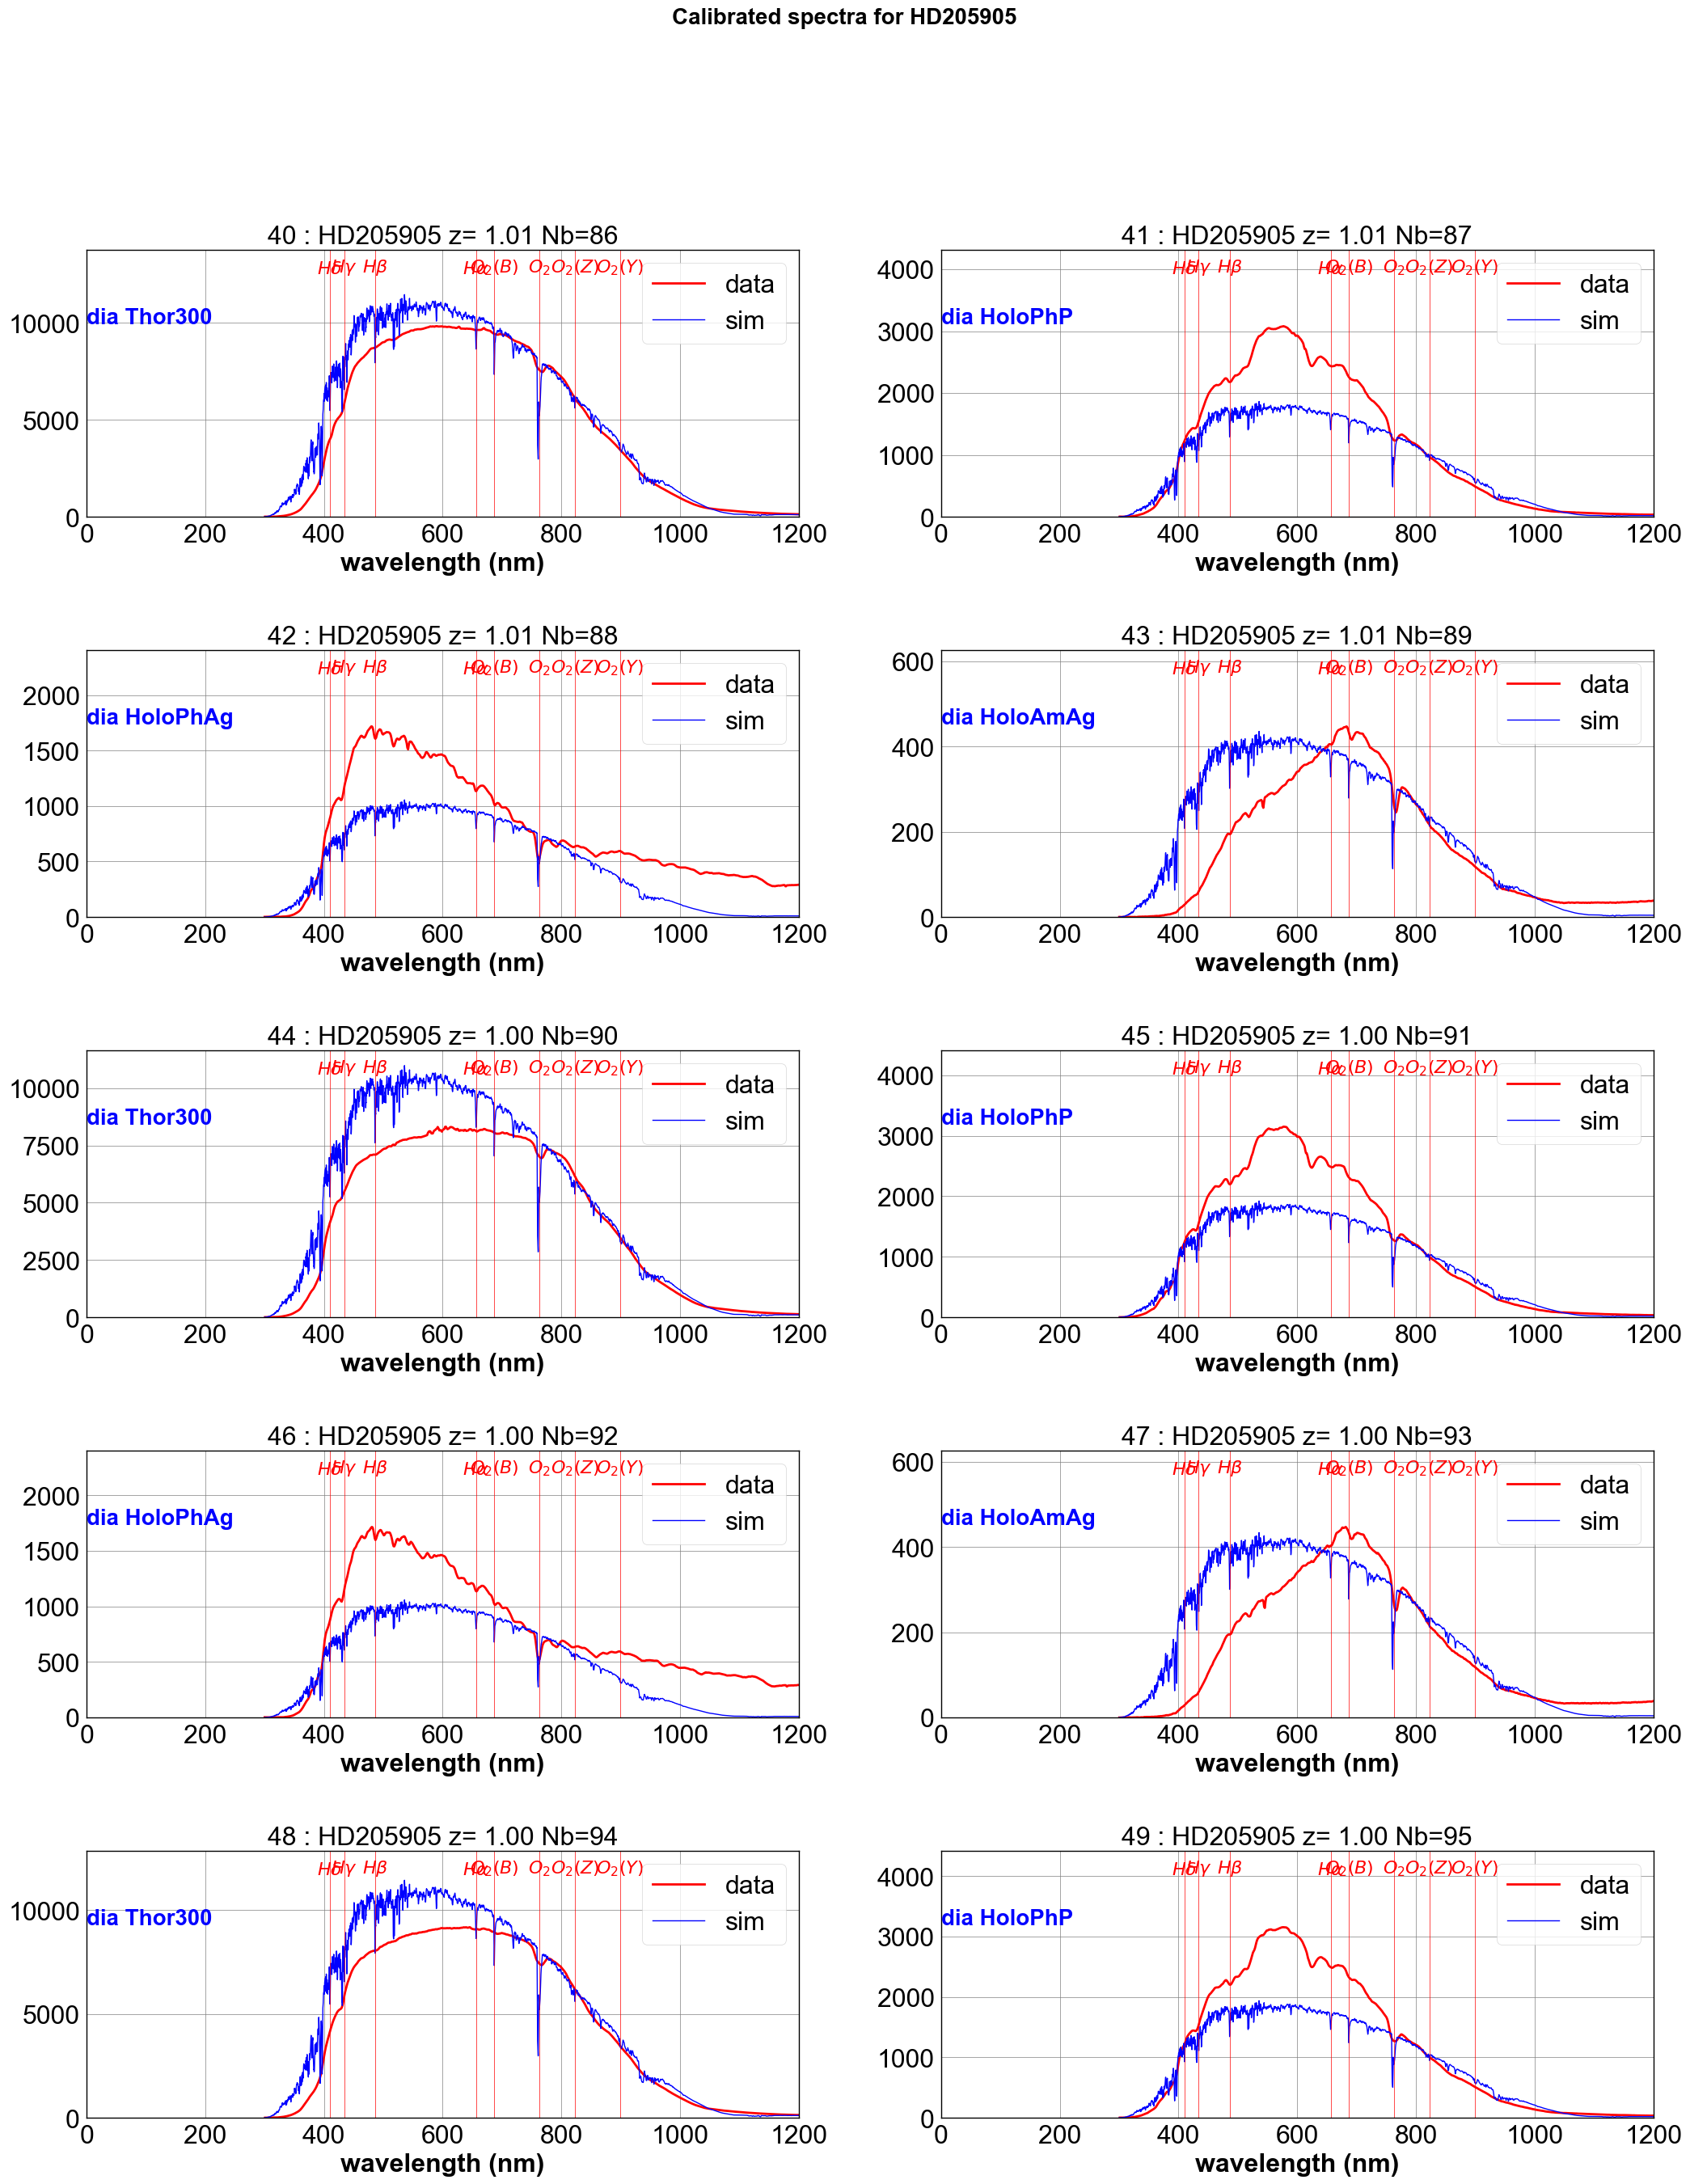

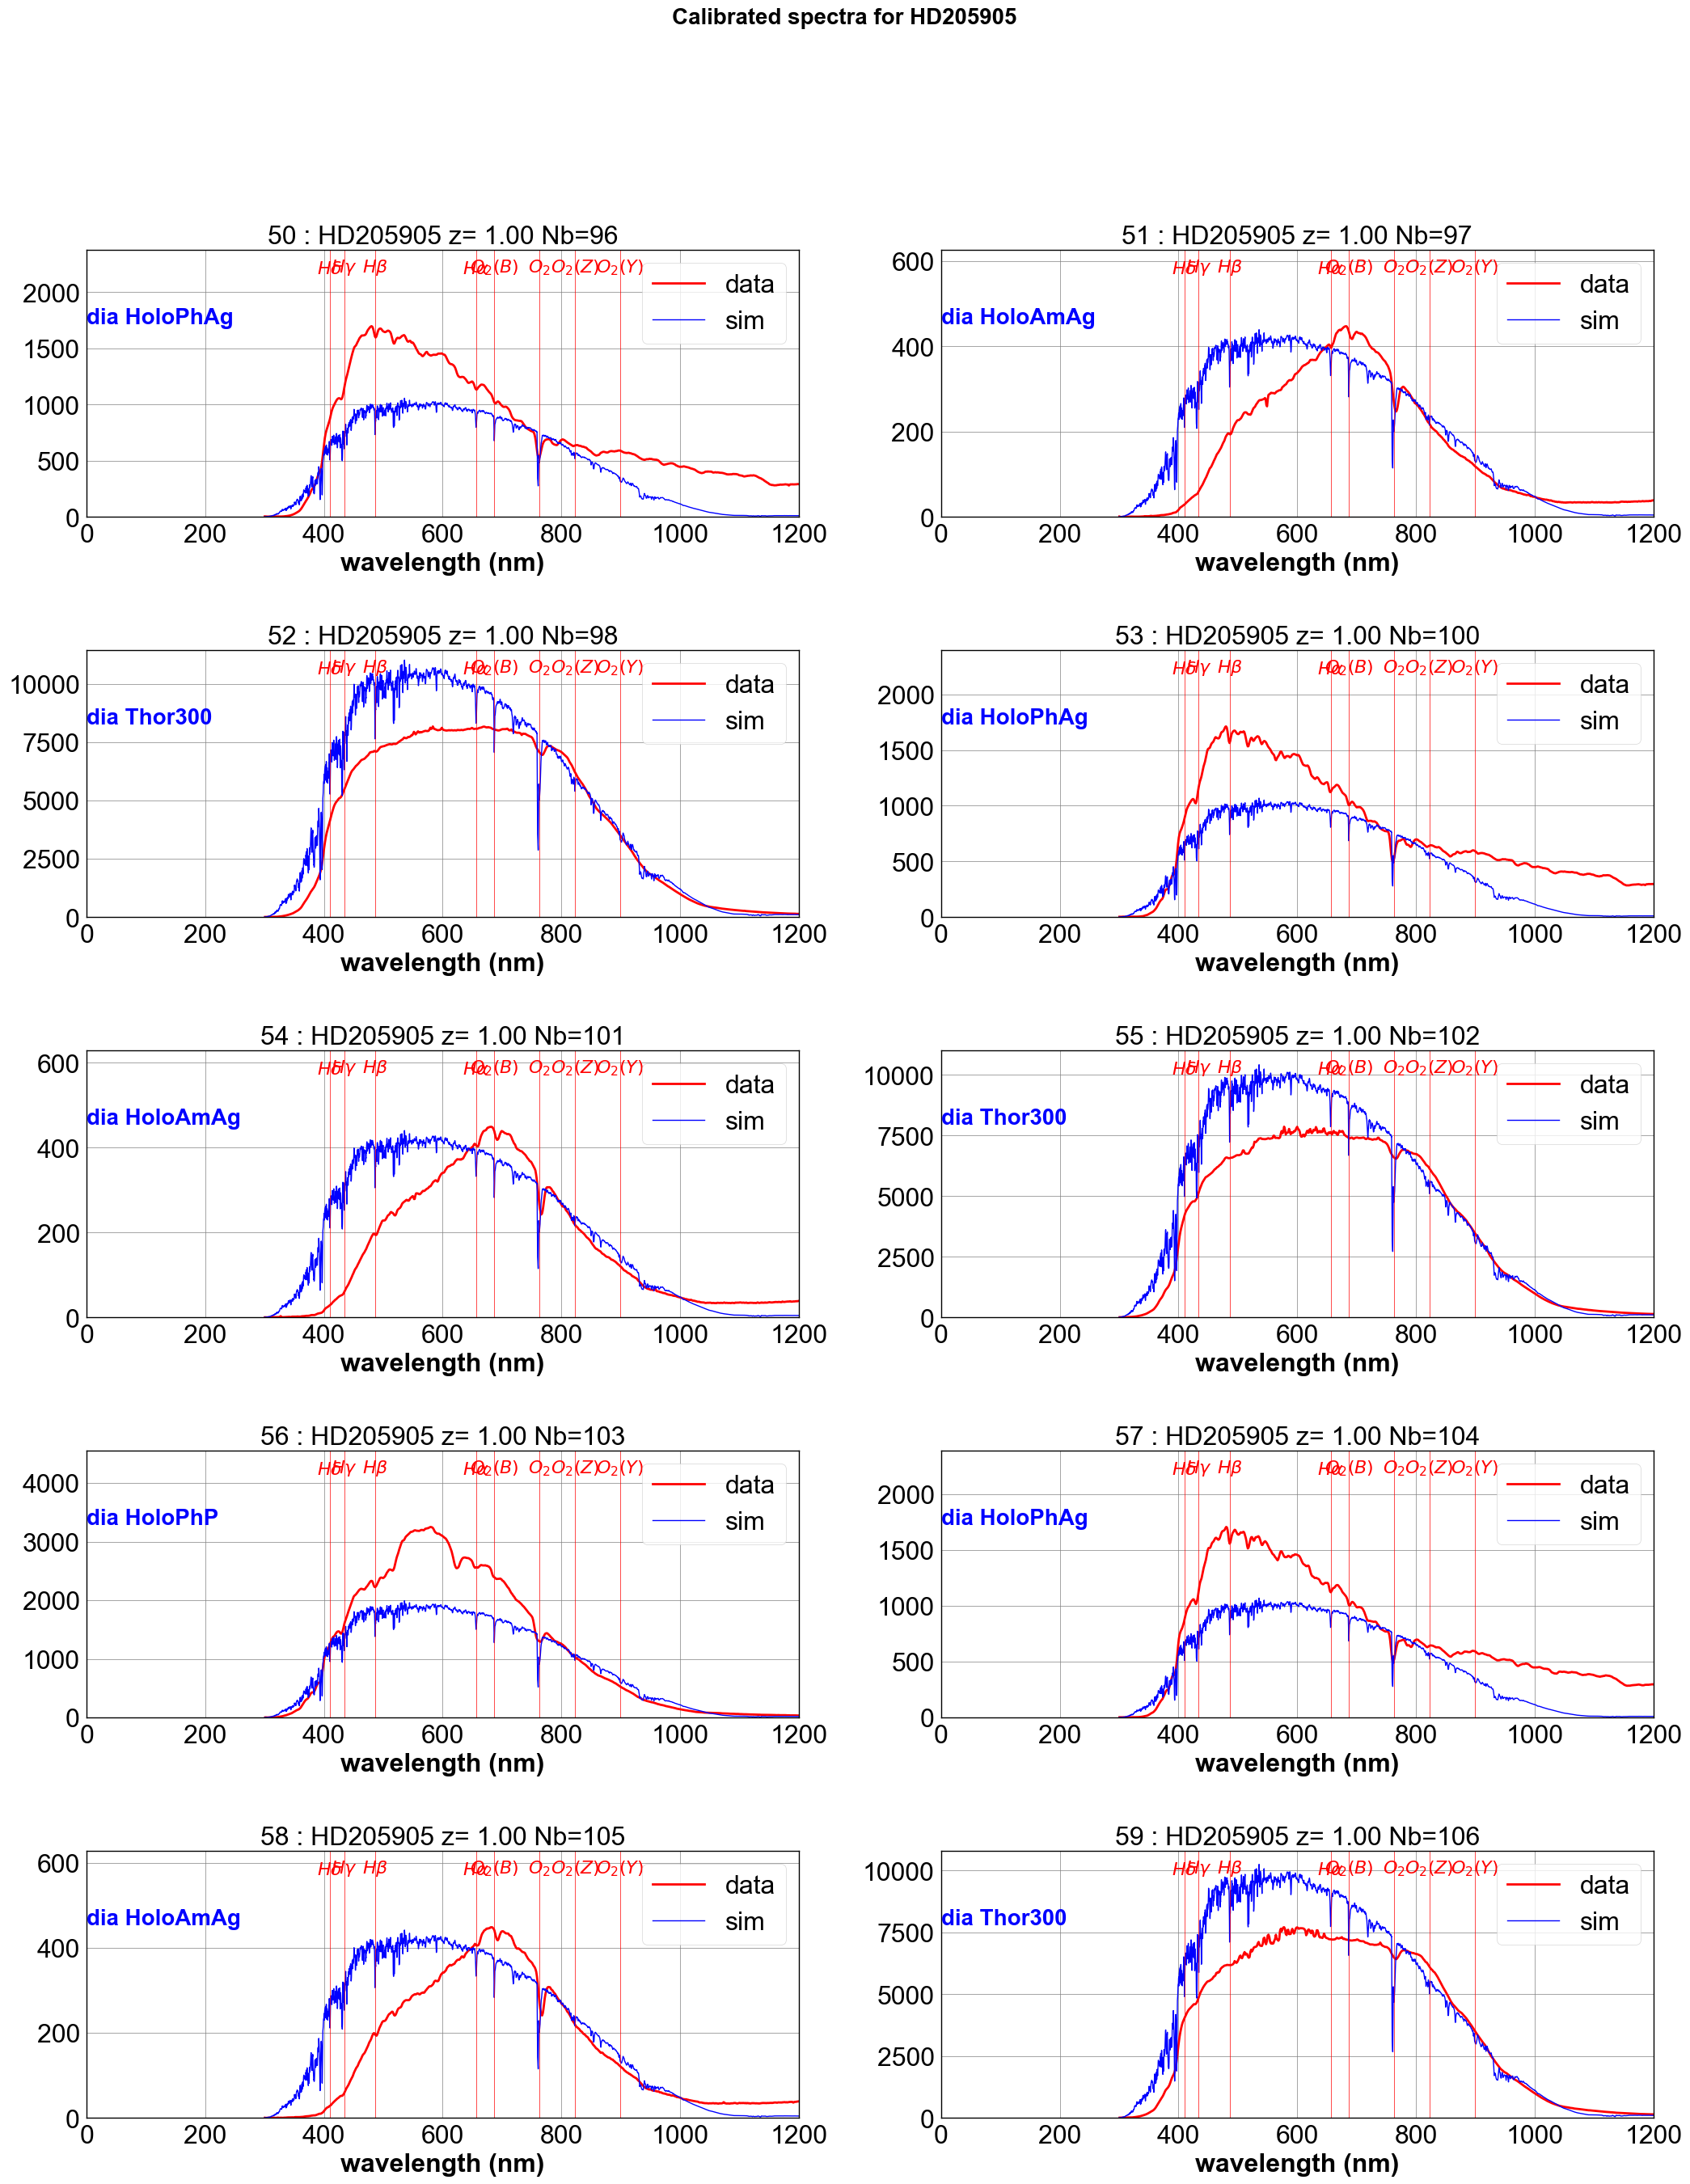

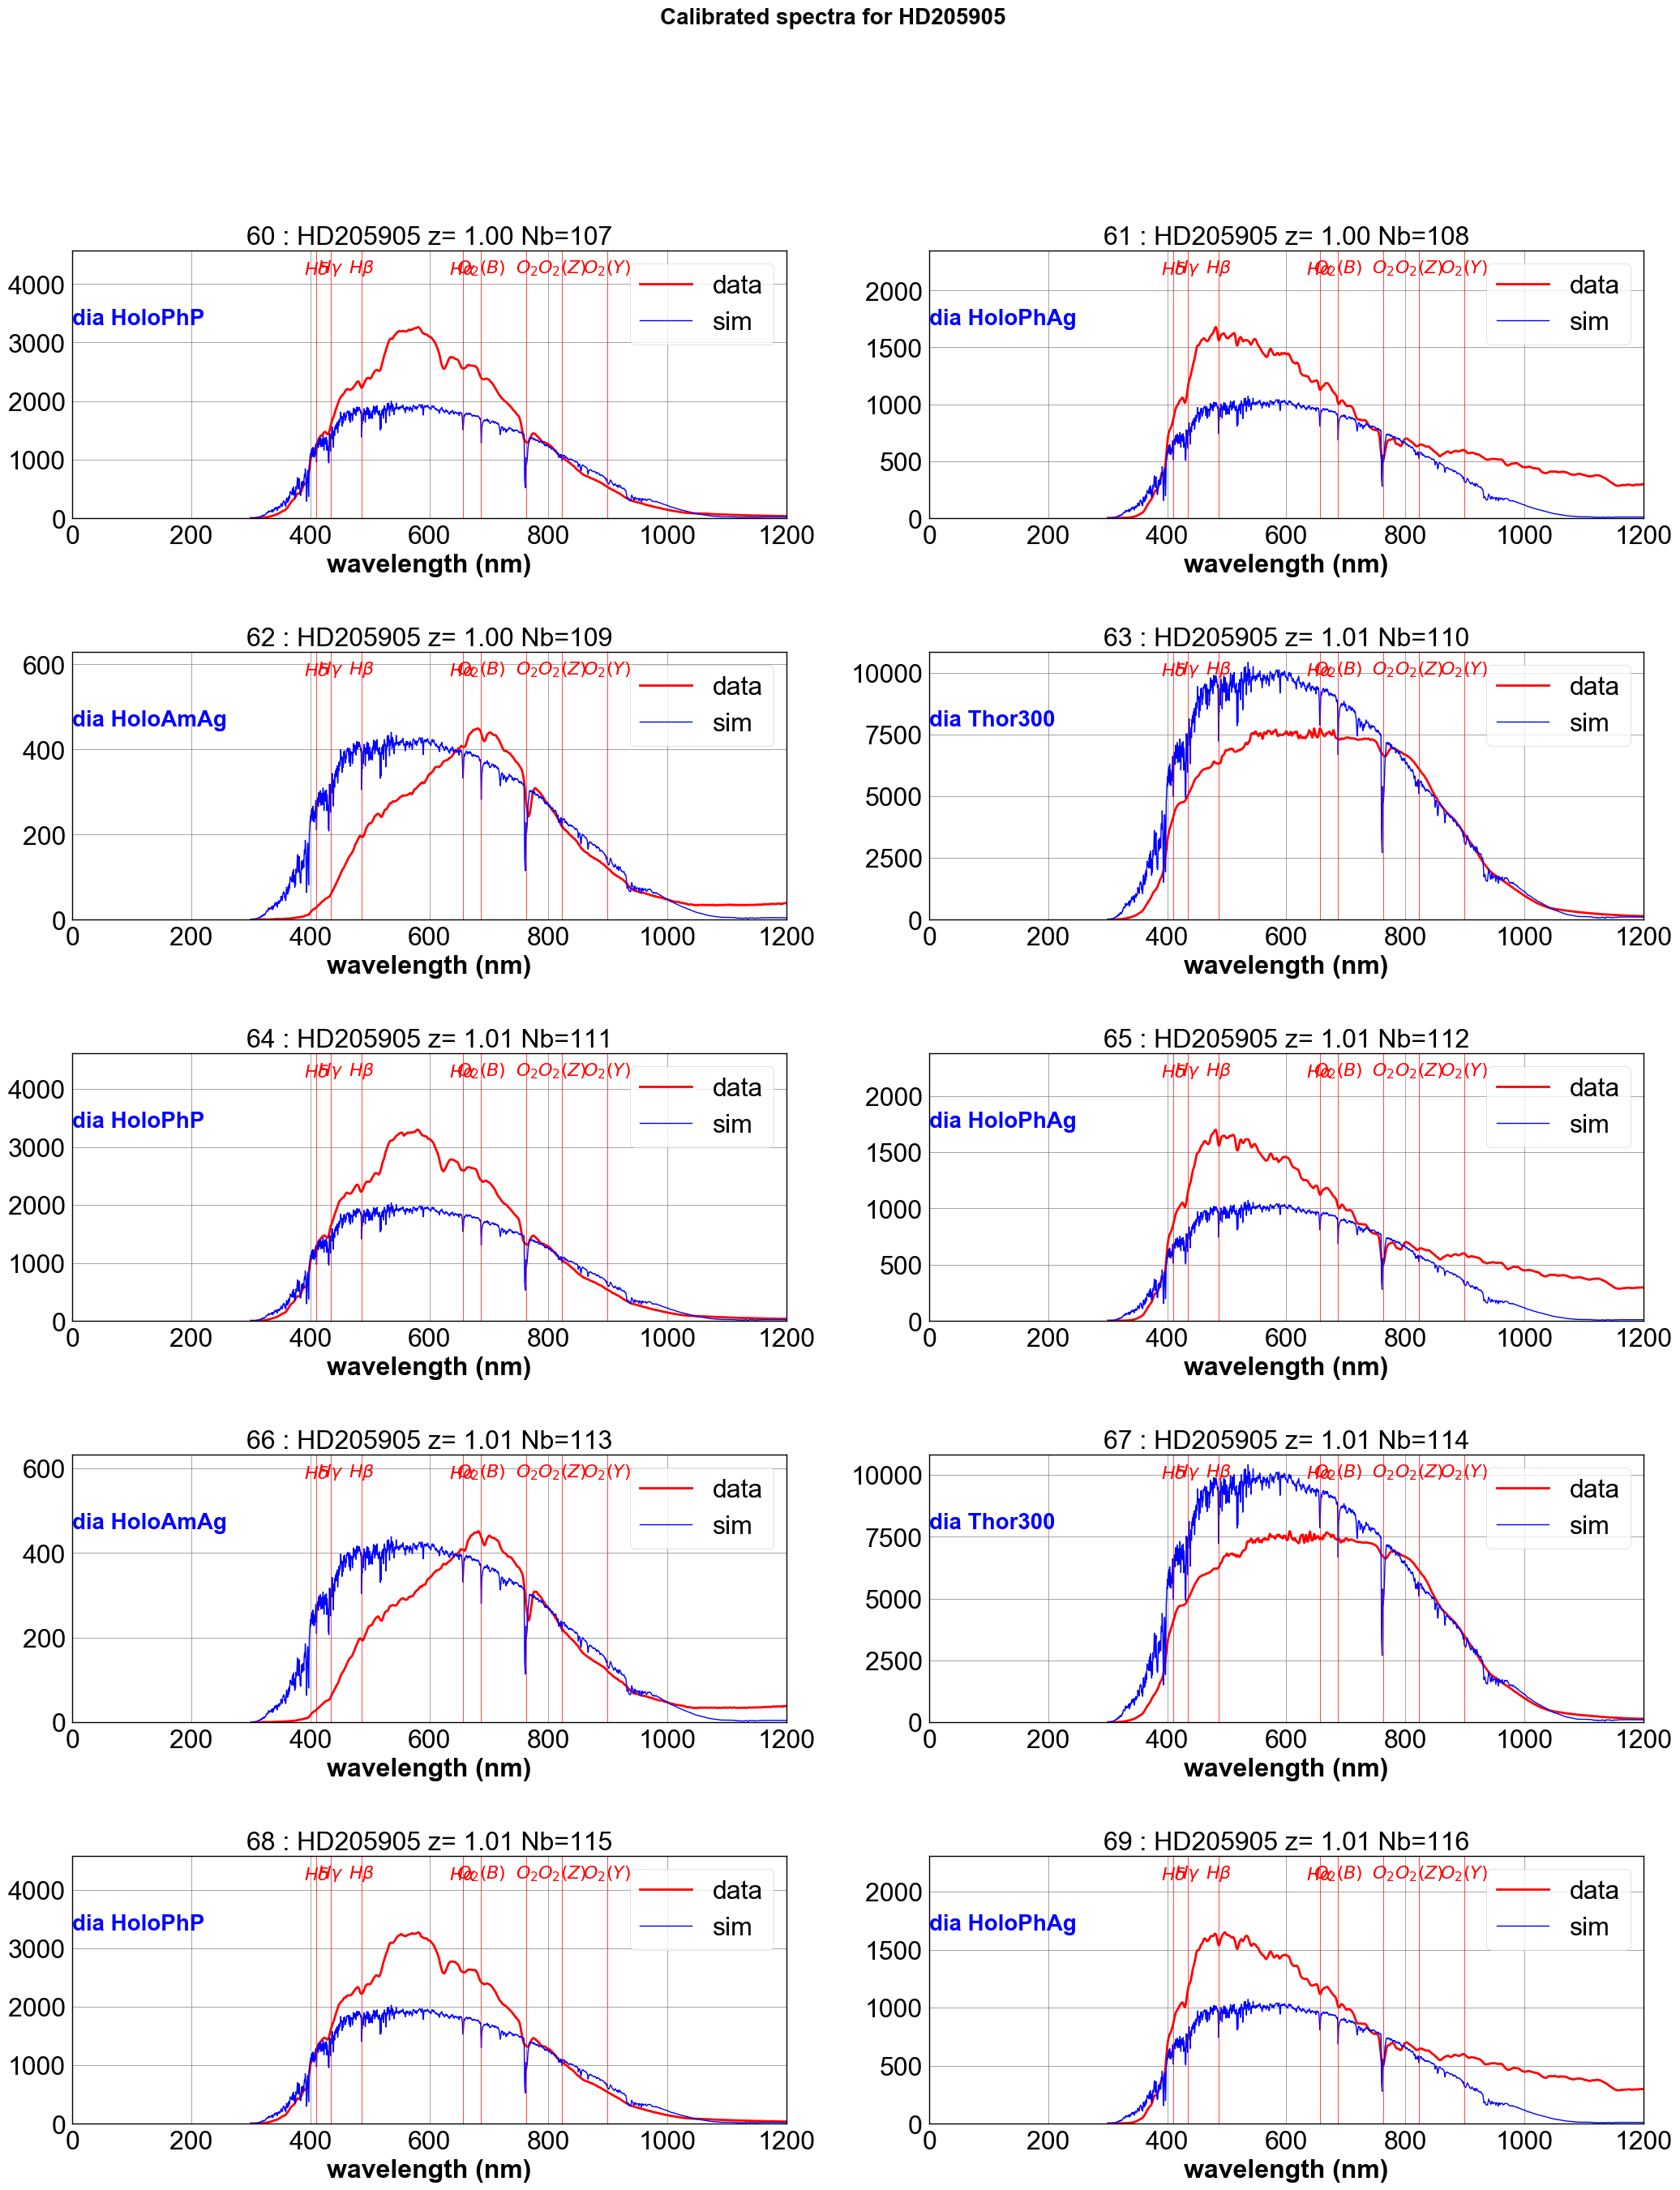

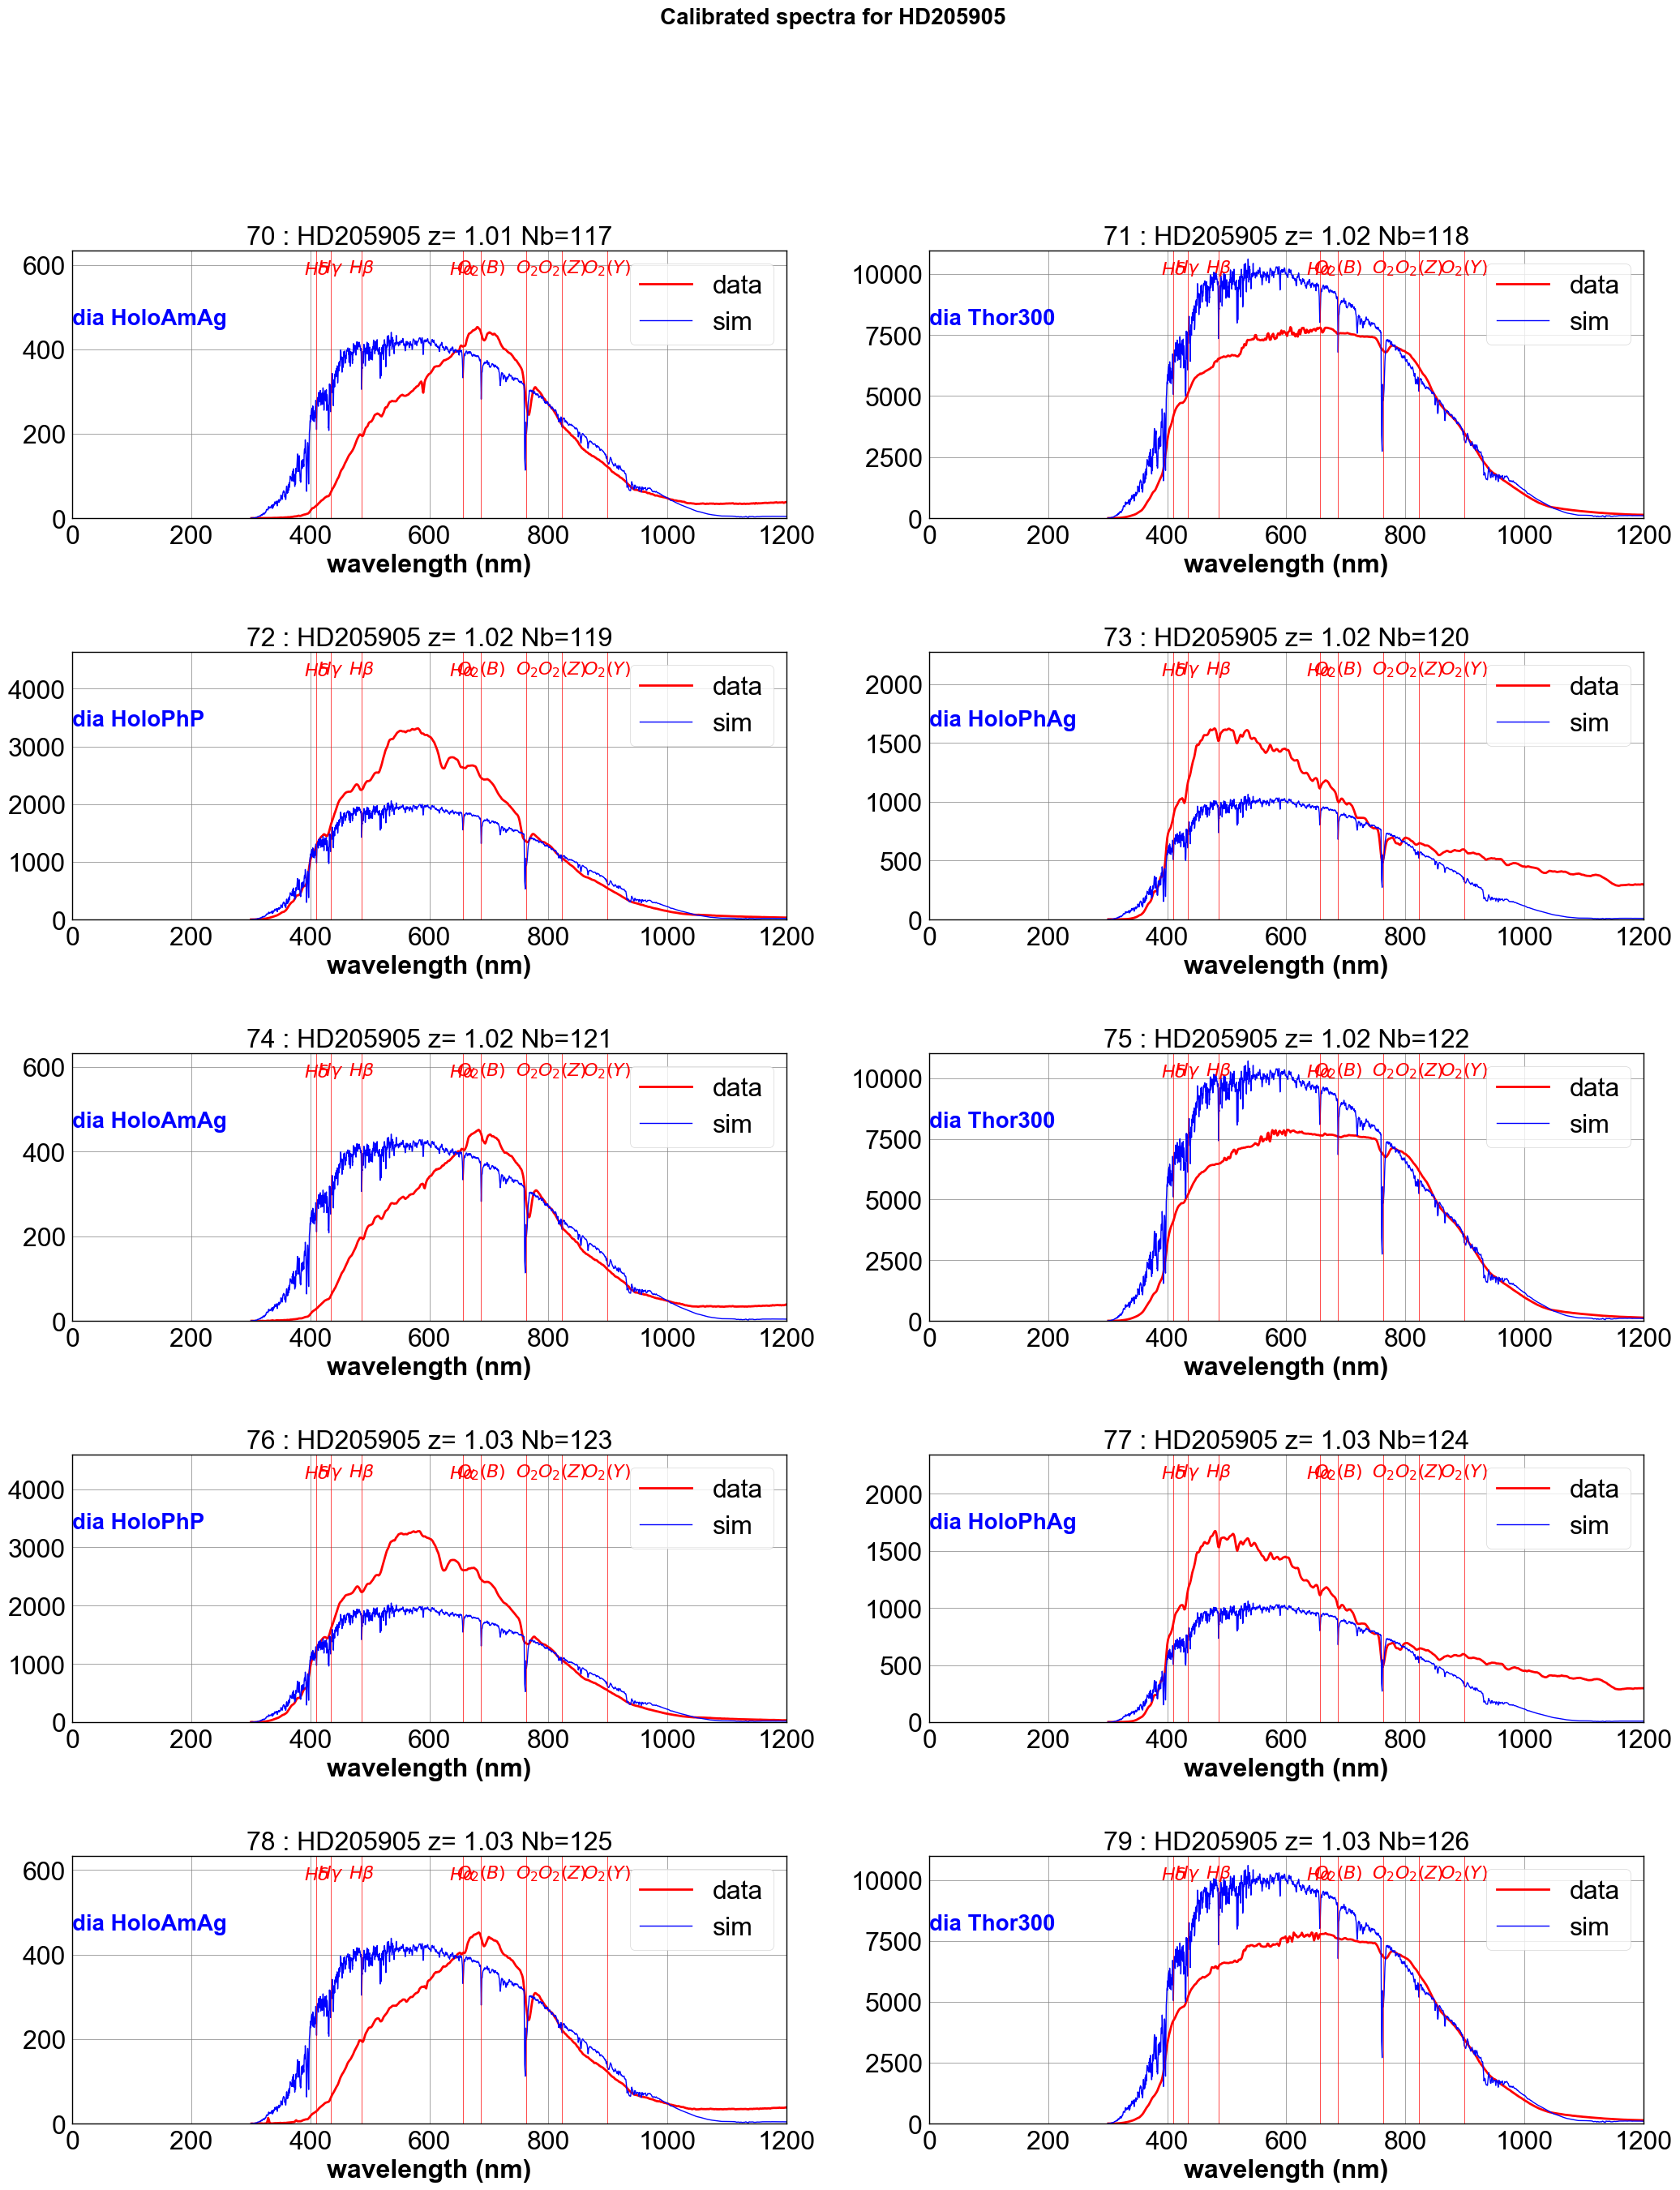

In [28]:
all_calibdatasimfactors=ShowCalibAndSimSpectrainPDF(all_rightspectra_data,all_rightspectra_wl,all_titles,object_name,all_filt,dir_top_images,all_sim_spectra_data,all_sim_spectra_wl)

## About Relative Calibration Factor

In [29]:
all_calibdatasimfactors=np.array(all_calibdatasimfactors)

In [31]:
Thor300_factor=all_calibdatasimfactors[Thor300_index]
#Ron400_factor=all_calibdatasimfactors[Ron400_index]
HoloPhP_factor=all_calibdatasimfactors[HoloPhP_index]
HoloPhAg_factor=all_calibdatasimfactors[HoloPhAg_index]
HoloAmAg_factor=all_calibdatasimfactors[HoloAmAg_index]


In [32]:
Thor300_factor_av=np.median(Thor300_factor)
#Ron400_factor_av=np.median(Ron400_factor)
HoloPhP_factor_av=np.median(HoloPhP_factor)
HoloPhAg_factor_av=np.median(HoloPhAg_factor)
HoloAmAg_factor_av=np.median(HoloAmAg_factor)

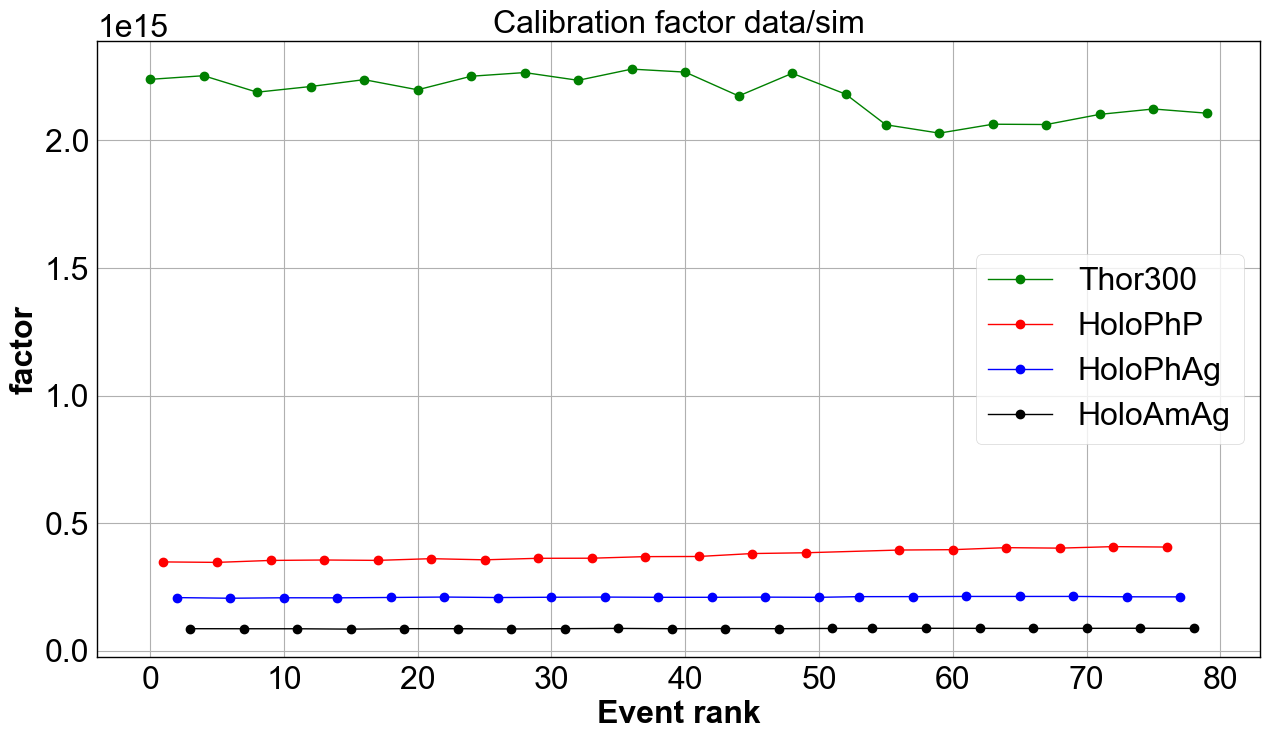

In [33]:
figfilename=os.path.join(dir_top_images,'calib_factor.pdf')

plt.figure(figsize=(15,8))

plt.plot(Thor300_index,Thor300_factor,marker='o',color='green',label='Thor300')
#plt.plot([0,Thor300_index.max()],[Thor300_factor_av,Thor300_factor_av],'g-')

#plt.plot(Ron400_index,Ron400_factor,marker='o',color='grey',label='Ron400')
#plt.plot([0,Ron400_index.max()],[Ron400_factor_av,Ron400_factor_av],'-',color='grey')

plt.plot(HoloPhP_index,HoloPhP_factor,marker='o',color='red',label='HoloPhP')
#plt.plot([0,HoloPhP_index.max()],[HoloPhP_factor_av,HoloPhP_factor_av],'r-')


plt.plot(HoloPhAg_index,HoloPhAg_factor,marker='o',color='blue',label='HoloPhAg')
#plt.plot([0,HoloPhAg_index.max()],[HoloPhAg_factor_av,HoloPhAg_factor_av],'b-')

plt.plot(HoloAmAg_index,HoloAmAg_factor,marker='o',color='black',label='HoloAmAg')
#plt.plot([0,HoloAmAg_index.max()],[HoloAmAg_factor_av,HoloAmAg_factor_av],'k-')


plt.grid(True)
plt.legend(loc='best')
plt.title('Calibration factor data/sim')
plt.xlabel("Event rank")
plt.ylabel("factor")
plt.savefig(figfilename) 

In [34]:
sel=0
thespectrum=all_rightspectra_data[sel]

In [36]:
def ShowOneSpectrum(sel):
    """
    ShowOneSpectrum
    ================
    """


    thespectrum=all_rightspectra_data[sel]
    thewl=all_rightspectra_wl[sel]
    ymin=thespectrum.min()
    ymax=thespectrum.max()*1.1
    
    wl_sim=all_sim_spectra_wl[sel]
    sim_spec=all_sim_spectra_data[sel]*all_calibdatasimfactors[sel]
    fig, ax = plt.subplots(1, 1, figsize=(15,8))


    ax.plot(thewl,thespectrum,'r-',lw=2,label='data')
    ax.plot(wl_sim,sim_spec,'b-',lw=2,label='sim')

    max_y_to_plot=thespectrum[:].max()*1.4
    ax.set_ylim(0.,max_y_to_plot)
    ax.text(0.,max_y_to_plot*1.1/1.4, all_filt[sel],verticalalignment='top', horizontalalignment='left',color='blue',fontweight='bold', fontsize=20)

    ax.set_title(all_titles[sel])
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='grey', linewidth=1.0)
    #ax.grid(b=True, which='minor', color='grey', linewidth=0.5)
    
        
    YMIN=0.
    YMAX=max_y_to_plot
    
    for line in LINES:
        if line == O2 or line == HALPHA or line == HBETA or line == HGAMMA or line == HDELTA or line == O2B or line == O2Y or line == O2Z:
            ax.plot([line['lambda'],line['lambda']],[YMIN,YMAX],'-',color='red',lw=0.5)
            ax.text(line['lambda'],0.9*(YMAX-YMIN),line['label'],verticalalignment='bottom', horizontalalignment='center',color='red', fontweight='bold',fontsize=16)
    

    ax.legend(loc='best',fontsize=20)
    ax.set_xlim(0,1100)
    ax.set_xlabel("$\lambda$ (nm)")
    
    figname='one_intput_calibrated_spectra_{}.pdf'.format(sel)
    
    figfilename=os.path.join(dir_top_images,figname)
    fig.savefig(figfilename)

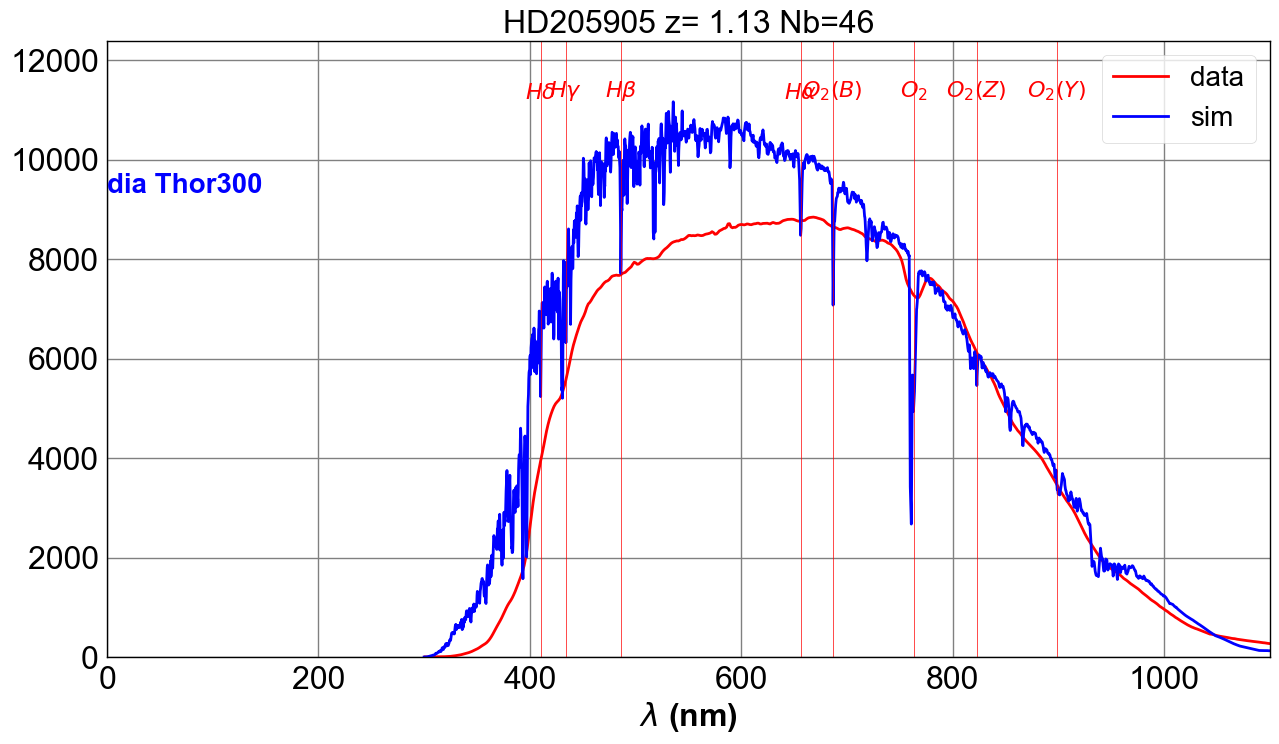

In [37]:
ShowOneSpectrum(0)

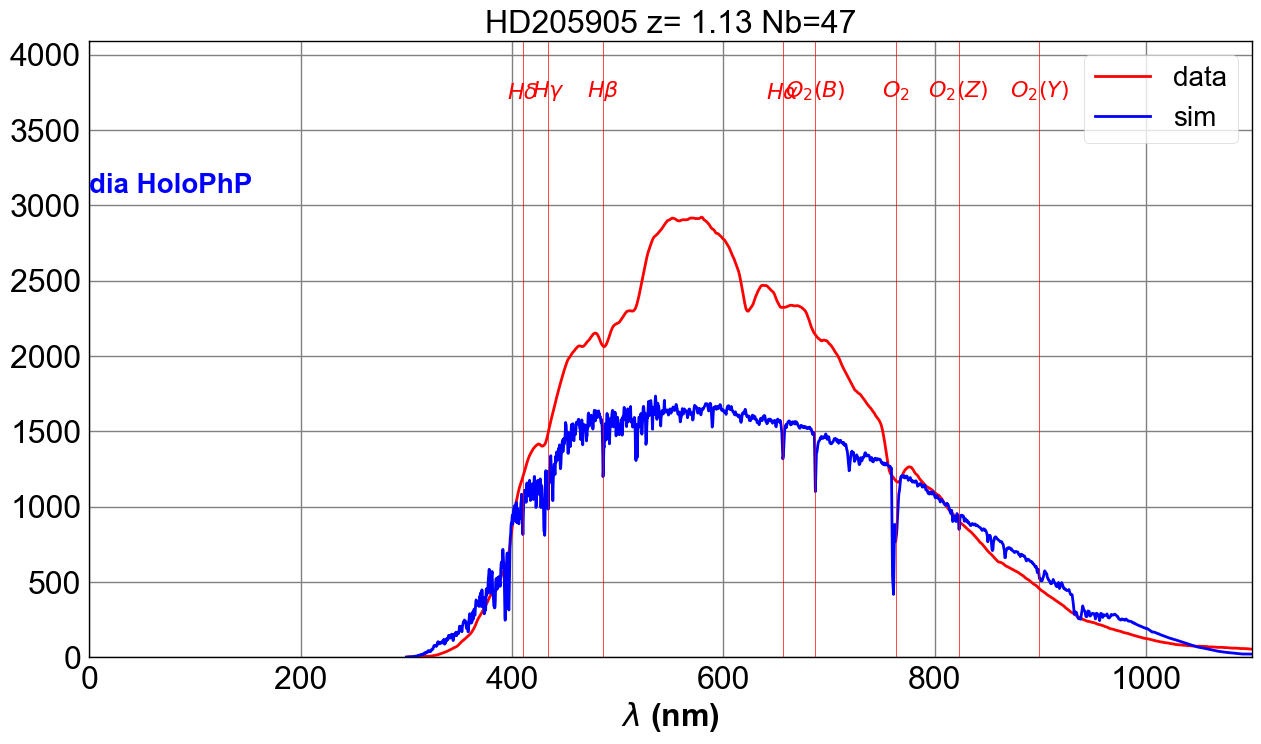

In [38]:
ShowOneSpectrum(1)

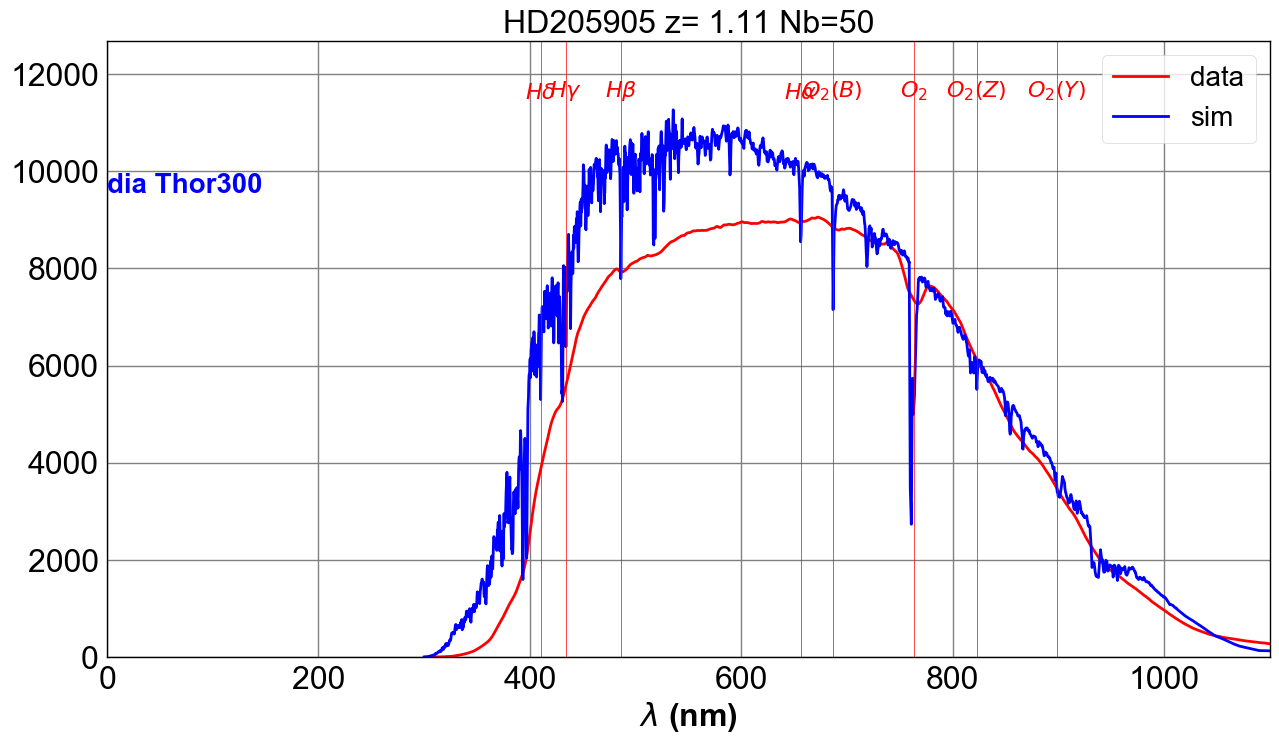

In [39]:
ShowOneSpectrum(4)

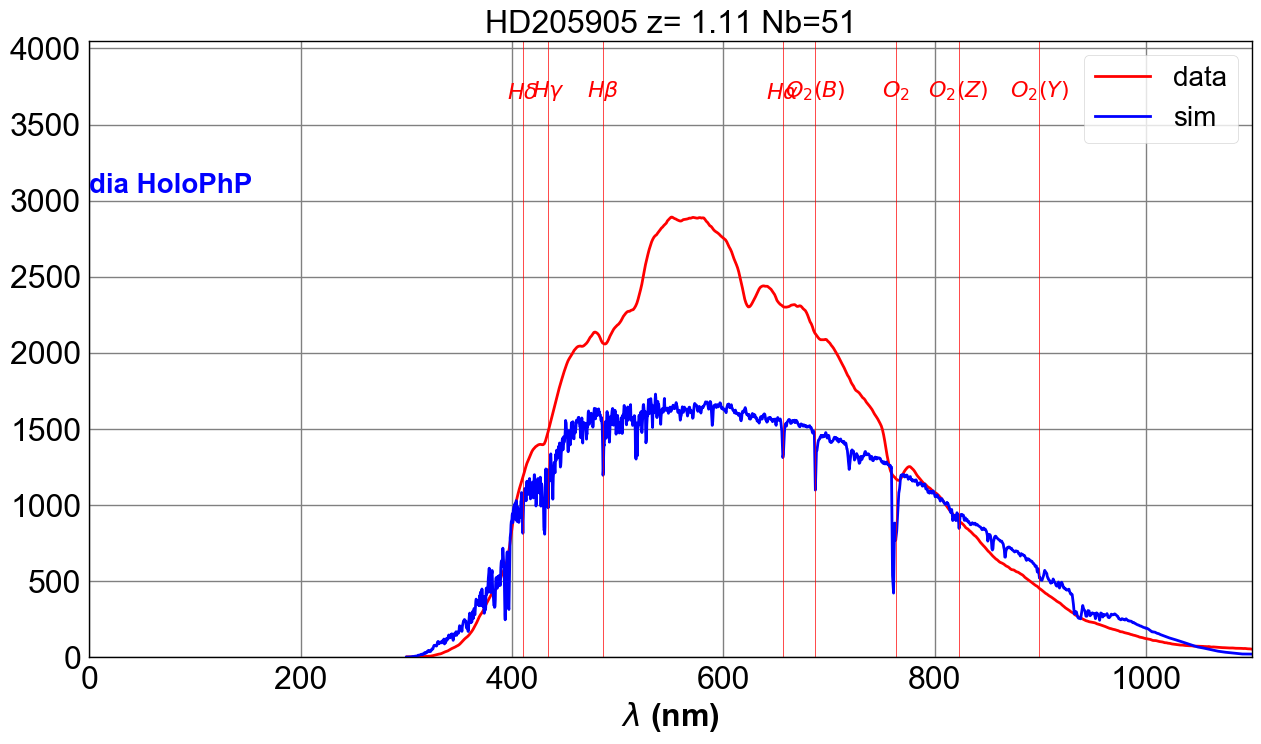

In [40]:
ShowOneSpectrum(5)

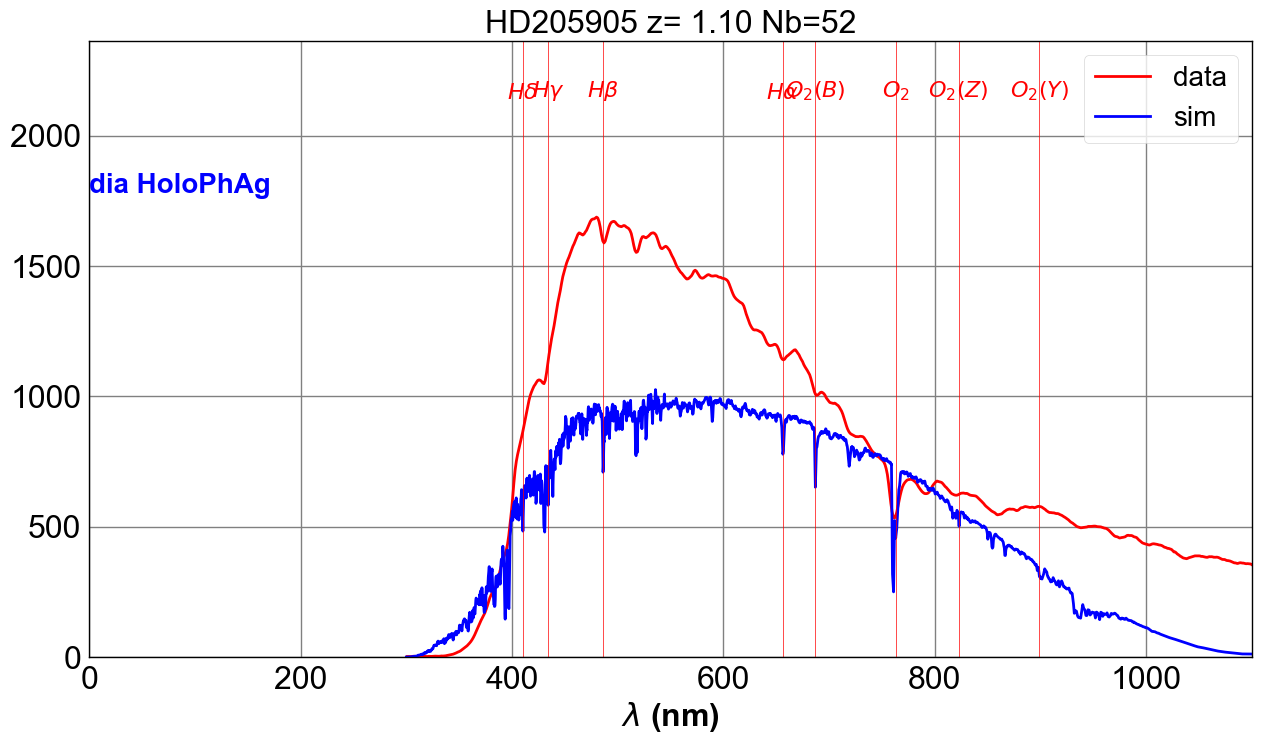

In [41]:
ShowOneSpectrum(6)

In [42]:
def ShowOneSpectrumNextFilt(sel):
    """
    ShowOneSpectrum
    ================
    """

    NBSPECTOPLOT=5
    
    the_spectra= []
    the_wl=[]
    the_max = []
    the_label= []
    
    for i in np.arange(NBSPECTOPLOT):

        the_spectrum=all_rightspectra_data[sel+i]
        thewl=all_rightspectra_wl[sel+i]
        theymin=the_spectrum.min()
        theymax=the_spectrum.max()
        thelabel=all_filt[sel+i]
        
        the_spectra.append(the_spectrum)
        the_wl.append(thewl)
        the_max.append(theymax)
        the_label.append(thelabel)

        
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    for i in np.arange(NBSPECTOPLOT):        
        ax.plot(the_wl[i],the_spectra[i],lw=3,label=the_label[i])

 
        
    max_y_to_plot=(np.array(the_max)).max()
    ymin=0
    ymax=max_y_to_plot
    ax.set_ylim(0.,max_y_to_plot*1.2)
    
    ax.set_title(all_titles[sel])
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='grey', linewidth=1.0)
    #ax.grid(b=True, which='minor', color='grey', linewidth=0.5)

    YMIN=0.
    YMAX=max_y_to_plot*1.1
    
    for line in LINES:
        if line == O2 or line == HALPHA or line == HBETA or line == HGAMMA or line == HDELTA or line == O2B or line == O2Y or line == O2Z:
            ax.plot([line['lambda'],line['lambda']],[YMIN,YMAX],'-',color='red',lw=0.5)
            ax.text(line['lambda'],0.9*(YMAX-YMIN),line['label'],verticalalignment='bottom', horizontalalignment='center',color='red', fontweight='bold',fontsize=16)
    
    ax.legend(loc='best',fontsize=20)
    ax.set_xlim(0,1100)
    ax.set_xlabel("$\lambda$ (nm)")
    ax.set_ylabel("ADU")
    
    
    figname='five_intput_calibrated_spectra_{}.pdf'.format(sel)
    figfilename=os.path.join(dir_top_images,figname)
    fig.savefig(figfilename)

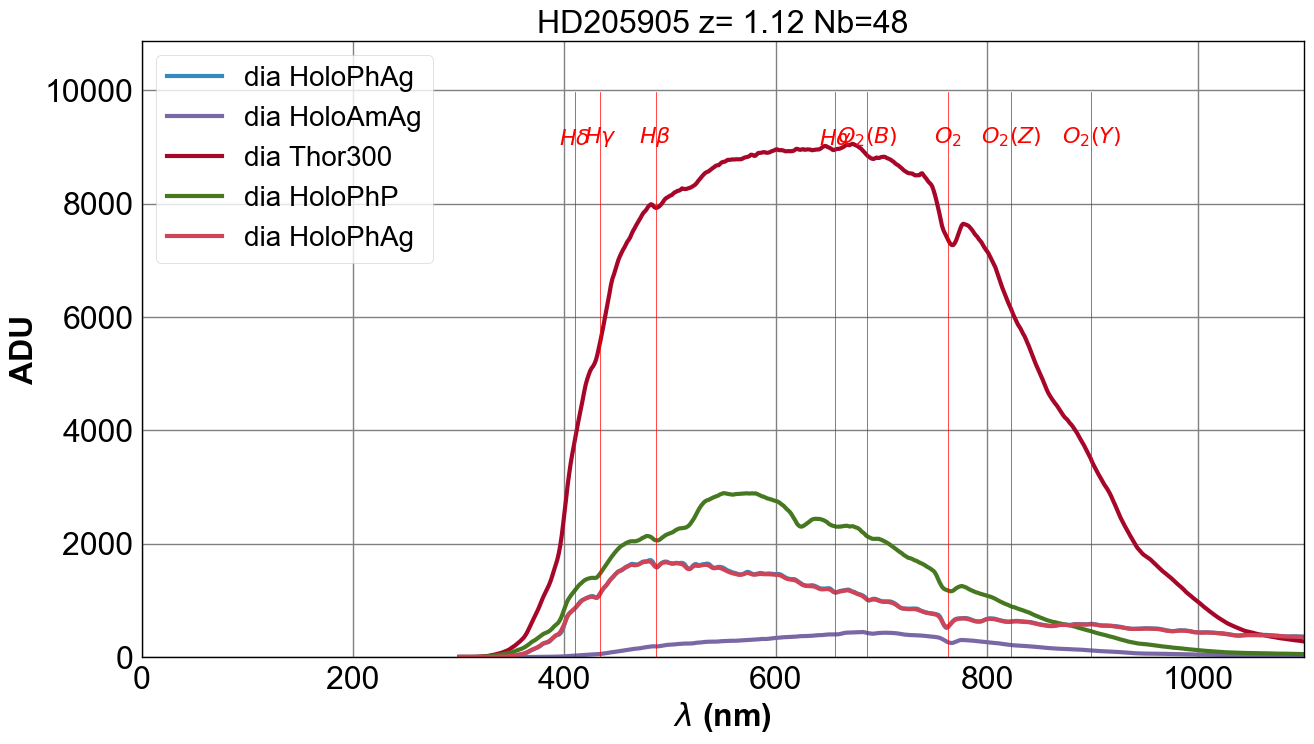

In [43]:
ShowOneSpectrumNextFilt(2)